In [1]:
import os
import wandb
import numpy as np
from IPython.display import clear_output
import seaborn as sns
from torchdiffeq import odeint
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
print("GPU Name:", torch.cuda.get_device_name(0))

In [3]:
def visualize(real=None, train=None, save=None, title=''):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    ax.set_title('Lorenz Attractor \n'+title)

    if train is not None:
      sns.set(style='darkgrid')
      
      z = np.array([o.detach().numpy() for o in train])
      z = np.reshape(z, [-1,3])
      sc = ax.scatter(z[:,0], z[:,1], z[:,2], c=z[:,2], cmap='Greens', s=1)
      #cbar = fig.colorbar(sc)

    if real is not None:
      #sns.set(style='darkgrid')
      
      z = np.array([o.detach().numpy() for o in real])
      z = np.reshape(z, [-1,3])
      ax.scatter(z[:,0], z[:,1], z[:,2], marker='.', color='k', alpha=0.5, linewidths=0, s=45)
      #sc = ax.scatter(z[:,0], z[:,1], z[:,2], c=z[:,2], cmap='Reds', s=1)
      #cbar = fig.colorbar(sc)
      #ax.scatter(, marker='.', c=c,cmap='viridis', alpha=0.5, linewidths=0, s=45)

    fig.canvas.draw()
    fig.canvas.flush_events()
    if save is not None:
        plt.savefig(save+'.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
    plt.show()

In [4]:
class LorenzTrain(nn.Module):
    """
    neural network for learning the chaotic lorenz system
    """
    def __init__(self):
        super(LorenzTrain, self).__init__()
        self.lin = nn.Linear(3, 512)
        self.lin3 = nn.Linear(512, 3)
        self.relu = nn.ReLU()

    def forward(self, t, x):
        x = self.relu(self.lin(x))
        x = self.lin3(x)
        return x
     

In [5]:
test_model = LorenzTrain().to(device)

In [6]:
test_model.load_state_dict(torch.load('saved_models\lorenz_node.pth'))

<All keys matched successfully>

In [7]:
class Lorenz(nn.Module):
    """
    chaotic lorenz system
    """
    def __init__(self):
        super(Lorenz, self).__init__()
        self.lin = nn.Linear(5, 3, bias=False)
        W = torch.tensor([[-10., 10., 0., 0., 0.],
                          [28., -1., 0., -1., 0.],
                          [0., 0., -8. / 3., 0., 1.]])
        self.lin.weight = nn.Parameter(W)

    def forward(self, t, x):
        y = y = torch.ones([1, 5])
        y[0][0] = x[0][0]
        y[0][1] = x[0][1]
        y[0][2] = x[0][2]
        y[0][3] = x[0][0] * x[0][2]
        y[0][4] = x[0][0] * x[0][1]
        return self.lin(y)

true_y0 = torch.tensor([[0.5, 0.5, 20.]])  # initial condition
t = torch.linspace(0., 10., 5000)  # t is from 0 to 25 for 1000 data points

# generating training data
with torch.no_grad():
    data = odeint(Lorenz(), true_y0, t)

In [8]:
t.shape

torch.Size([5000])

In [9]:
predicted_trajectory = odeint(test_model, data[0], t)

In [10]:
predicted_trajectory = odeint(test_model, data[0].to(device), t.to(device))

In [11]:
positions = pred_2[:, :]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]

# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0].detach().numpy(), positions[:, 1].detach().numpy(), U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [12]:
pred_2 = predicted_trajectory

In [13]:
positions = pred_2[:, :]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]

# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0].detach().numpy(), positions[:, 1].detach().numpy(), U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [14]:
positions = pred_2[:, :2]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]

# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0].detach().numpy(), positions[:, 1].detach().numpy(), U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [15]:
pred_2.shape

torch.Size([5000, 1, 3])

In [16]:
positions = pred_2[:, :,:2]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]

# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0].detach().numpy(), positions[:, 1].detach().numpy(), U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [17]:
positions = pred_2[:, :,:3]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]

# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0].detach().numpy(), positions[:, 1].detach().numpy(), U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [18]:
positions = pred_2[:, :,:3]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]
print(vector_field.shape)
# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0].detach().numpy(), positions[:, 1].detach().numpy(), U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [19]:
positions = pred_2[:, :,:]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]
print(vector_field.shape)
# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0].detach().numpy(), positions[:, 1].detach().numpy(),positions[:, 2].detach().numpy(), U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [20]:
positions = pred_2[:, :,:]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]
print(vector_field.shape)
# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
Z = vector_field[:, 2]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0].detach().numpy(), positions[:, 1].detach().numpy(),positions[:, 2].detach().numpy(), U, V,Z, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [21]:
positions = pred_2[:, :,:]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]
print(vector_field.shape)
# Extract the x and y components of the vector field
U = vector_field[:,:, 0]
V = vector_field[:, :,1]
Z = vector_field[:, :,2]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0].detach().numpy(), positions[:, 1].detach().numpy(),positions[:, 2].detach().numpy(), U, V,Z, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [22]:
positions = pred_2[:, :,:]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]
print(vector_field.shape)
# Extract the x and y components of the vector field
U = vector_field[:,:, 0]
V = vector_field[:, :,1]
Z = vector_field[:, :,2]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0].cpu().detach().numpy(), positions[:, 1].cpu().detach().numpy(),positions[:, 2].cpu().detach().numpy(), U, V,Z, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [23]:
positions.shape

torch.Size([5000, 1, 3])

In [24]:
positions = pred_2[:, :,:]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]
print(vector_field.shape)
# Extract the x and y components of the vector field
U = vector_field[:,:, 0]
V = vector_field[:, :,1]
Z = vector_field[:, :,2]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:,:, 0].cpu().detach().numpy(), positions[:,:, 1].cpu().detach().numpy(),positions[:,:, 2].cpu().detach().numpy(), U, V,Z, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [25]:
positions = pred_2[:, :,:]  # Assuming the first 2 columns are positions

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]
print(vector_field.shape)
# Extract the x and y components of the vector field
U = vector_field[:,:, 0]
V = vector_field[:, :,1]


# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:,:, 0].cpu().detach().numpy(), positions[:,:, 1].cpu().detach().numpy(),positions[:,:, 2].cpu().detach().numpy(), U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [26]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Enable gradients for both the input and target tensors
pred_2.requires_grad = True
positions.requires_grad = True

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0], positions[:, 1], U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [27]:
pred_2 = predicted_trajectory

In [28]:
pred_2.shape

torch.Size([5000, 1, 3])

In [29]:
predicted_trajectory = odeint(test_model, data[0].to(device), t.to(device))

In [30]:
pred_2 = predicted_trajectory

In [31]:
pred_2.shape

torch.Size([5000, 1, 3])

In [32]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Enable gradients for both the input and target tensors
pred_2.requires_grad = True
positions.requires_grad = True

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, pred_2, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0], positions[:, 1], U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [33]:
# Extract positions from the predictions
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions (assuming they are the state variables)
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0], positions[:, 1], U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [34]:
# Extract positions from the predictions
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()

# Plot the vector field
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0], positions[:, 1], U, V, width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field')
plt.show()

In [35]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]
arrow_U = U[::arrow_step]
arrow_V = V[::arrow_step]

# Plot the vector field with arrows
plt.figure(figsize=(10, 8))
plt.quiver(positions[:, 0], positions[:, 1], arrow_U, arrow_V, width=0.004, alpha=0.6, color='b')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field with Arrows')
plt.show()

In [36]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
arrow_U = U / np.sqrt(U**2 + V**2 + W**2)
arrow_V = V / np.sqrt(U**2 + V**2 + W**2)

# Plot the vector field with arrows
plt.figure(figsize=(10, 8))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6, color='b')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field with Arrows')
plt.show()

In [37]:
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

In [38]:
arrow_positions.shape

(250, 3)

In [39]:
arrow_step = 200  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

In [40]:
arrow_positions.shape

(25, 3)

In [41]:
arrow_step = 2  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

In [42]:
arrow_positions.shape

(2500, 3)

In [43]:
arrow_step = 1  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

In [44]:
arrow_positions.shape

(5000, 3)

In [45]:
predicted_trajectory = odeint(test_model, data[0].to(device), t.to(device))

In [46]:
pred_2 = predicted_trajectory

In [47]:
pred_2.shape

torch.Size([5000, 1, 3])

In [48]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 1  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
arrow_U = U / np.sqrt(U**2 + V**2 + W**2)
arrow_V = V / np.sqrt(U**2 + V**2 + W**2)

# Plot the vector field with arrows
plt.figure(figsize=(10, 8))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6, color='b')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field with Arrows')
plt.show()

In [49]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2 + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
plt.figure(figsize=(10, 8))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6, color='b')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field with Arrows')
plt.show()

In [50]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2 + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
plt.figure(figsize=(10, 8))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field with Arrows')
plt.show()

In [51]:
positions = pred_2[:, 0, :3]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
#W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
#W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2)# + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
plt.figure(figsize=(10, 8))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field with Arrows')
plt.show()

In [52]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2 + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
plt.figure(figsize=(10, 8))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field with Arrows')
plt.show()

In [53]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2 + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
plt.figure(figsize=(6, 6))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field with Arrows')
plt.show()

In [54]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2 + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
plt.figure(figsize=(4, 4))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vector Field with Arrows')
plt.show()

In [55]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2 + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
plt.figure(figsize=(4, 4))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Lorenz Vector Field')
plt.show()

In [56]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2 + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
plt.figure(figsize=(4, 4))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Lorenz NODE Vector Field')
plt.show()

In [57]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2 + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
plt.figure(figsize=(4, 4))
plt.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
#plt.xlabel('X Position')
#plt.ylabel('Y Position')
plt.title('Lorenz NODE Vector Field')
plt.show()

In [58]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2 + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
fig, ax = plt.subplots(figsize=(10, 8))
ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xlabel('')   # Remove x-axis label
ax.set_ylabel('')   # Remove y-axis label
plt.title('Lorenz NODE Vector Field')
plt.show()

In [59]:
from torch.utils.data import DataLoader

In [60]:
import os
import wandb
import numpy as np
from IPython.display import clear_output
import seaborn as sns
from torchdiffeq import odeint
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
print("GPU Name:", torch.cuda.get_device_name(0))

In [62]:
wandb.login()

True

In [63]:
wandb.init(project="lorenz_NODE", group="Lorenz",save_code=True,notes="Neural ODE runs and evaluation")

In [64]:
def visualize(real=None, train=None, save=None, title=''):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    ax.set_title('Lorenz Attractor \n'+title)

    if train is not None:
      sns.set(style='darkgrid')
      
      z = np.array([o.detach().numpy() for o in train])
      z = np.reshape(z, [-1,3])
      sc = ax.scatter(z[:,0], z[:,1], z[:,2], c=z[:,2], cmap='Greens', s=1)
      #cbar = fig.colorbar(sc)

    if real is not None:
      #sns.set(style='darkgrid')
      
      z = np.array([o.detach().numpy() for o in real])
      z = np.reshape(z, [-1,3])
      ax.scatter(z[:,0], z[:,1], z[:,2], marker='.', color='k', alpha=0.5, linewidths=0, s=45)
      #sc = ax.scatter(z[:,0], z[:,1], z[:,2], c=z[:,2], cmap='Reds', s=1)
      #cbar = fig.colorbar(sc)
      #ax.scatter(, marker='.', c=c,cmap='viridis', alpha=0.5, linewidths=0, s=45)

    fig.canvas.draw()
    fig.canvas.flush_events()
    if save is not None:
        plt.savefig(save+'.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
    plt.show()

In [65]:
class Lorenz(nn.Module):
    """
    chaotic lorenz system
    """
    def __init__(self):
        super(Lorenz, self).__init__()
        self.lin = nn.Linear(5, 3, bias=False)
        W = torch.tensor([[-10., 10., 0., 0., 0.],
                          [28., -1., 0., -1., 0.],
                          [0., 0., -8. / 3., 0., 1.]])
        self.lin.weight = nn.Parameter(W)

    def forward(self, t, x):
        y = y = torch.ones([1, 5])
        y[0][0] = x[0][0]
        y[0][1] = x[0][1]
        y[0][2] = x[0][2]
        y[0][3] = x[0][0] * x[0][2]
        y[0][4] = x[0][0] * x[0][1]
        return self.lin(y)

true_y0 = torch.tensor([[0.5, 0.5, 20.]])  # initial condition
t = torch.linspace(0., 10., 5000)  # t is from 0 to 25 for 1000 data points

In [66]:
class Lorenz(nn.Module):
    """
    chaotic lorenz system
    """
    def __init__(self):
        super(Lorenz, self).__init__()
        self.lin = nn.Linear(5, 3, bias=False)
        W = torch.tensor([[-10., 10., 0., 0., 0.],
                          [28., -1., 0., -1., 0.],
                          [0., 0., -8. / 3., 0., 1.]])
        self.lin.weight = nn.Parameter(W)

    def forward(self, t, x):
        y = y = torch.ones([1, 5])
        y[0][0] = x[0][0]
        y[0][1] = x[0][1]
        y[0][2] = x[0][2]
        y[0][3] = x[0][0] * x[0][2]
        y[0][4] = x[0][0] * x[0][1]
        return self.lin(y)

true_y0 = torch.tensor([[0.5, 0.5, 20.]])  # initial condition
t = torch.linspace(0., 50., 5000)  # t is from 0 to 25 for 1000 data points

In [67]:
# generating training data
with torch.no_grad():
    data = odeint(Lorenz(), true_y0, t)

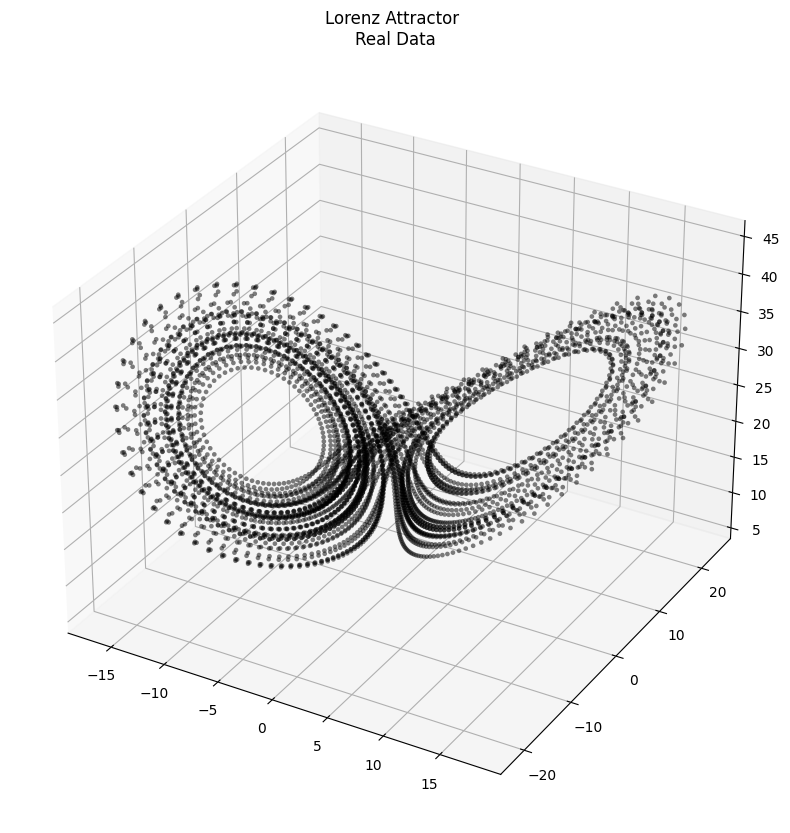

In [68]:
visualize(real=data,save='real',title='Real Data')

In [69]:
data.shape

torch.Size([5000, 1, 3])

In [70]:
t.shape

torch.Size([5000])

In [71]:
wandb_config = {
    'hidden_size': 512,
    'learning_rate': 1e-2,
    'batch_size': 50,
    'max_iterations': 1000,
}

# Initialize wandb configuration
wandb.config.update(wandb_config)

In [72]:
class LorenzTrain(nn.Module):
    """
    neural network for learning the chaotic lorenz system
    """
    def __init__(self):
        super(LorenzTrain, self).__init__()
        self.lin = nn.Linear(3, 512)
        self.lin3 = nn.Linear(512, 3)
        self.relu = nn.ReLU()

    def forward(self, t, x):
        x = self.relu(self.lin(x))
        x = self.lin3(x)
        return x
     

In [73]:
def get_batch(true_y, batch_size):
    num_samples = len(true_y)
    indices = np.random.choice(np.arange(num_samples - batch_size, dtype=np.int64), size=batch_size, replace=False)
    indices.sort()
    batch_y0 = true_y[indices]  # (batch_size, D)
    batch_t = t[:batch_size]  # (batch_size)
    batch_y = torch.stack([true_y[indices + i] for i in range(batch_size)], dim=0)  # (batch_size, M, D)
    return batch_y0, batch_t, batch_y

In [74]:
np.random.seed(7)
torch.manual_seed(7)

In [75]:
func = LorenzTrain().to(device)  # initializing Neural ODE
visualizer = visualize
optimizer = optim.Adam(func.parameters(), lr=1e-2)

In [76]:
data_tensor = torch.load('data_tensor.pt')

In [77]:
data_tensor.shape

torch.Size([10, 5000, 1, 3])

In [78]:
train = data_tensor[:6].to(device)
val = data_tensor[6].to(device)
test = data_tensor[7:].to(device)

In [79]:
train.shape

torch.Size([6, 5000, 1, 3])

In [80]:
data.shape

torch.Size([5000, 1, 3])

In [81]:
train = train.view(30000,1,3)

In [82]:
t = t.to(device)

In [83]:
batch_y0, batch_t, batch_y = get_batch(train,50)  # getting trajectory batch
pred_y = odeint(func, batch_y0, batch_t)

In [84]:
pred_y.shape

torch.Size([50, 50, 1, 3])

In [85]:
pred_y = odeint(func, test[0][0], t)

In [86]:
pred_y.shape

torch.Size([5000, 1, 3])

In [87]:
val.shape

torch.Size([5000, 1, 3])

In [88]:
#os.makedirs("PNG")

In [89]:
input_seq = test[0][0]

In [90]:
test_model = LorenzTrain().to(device)

In [91]:
test_model.load_state_dict(torch.load('saved_models\lorenz_node.pth'))

<All keys matched successfully>

In [92]:
mse_loss = F.mse_loss()

In [93]:
# Generate a more accurate simulation using the learned dynamics
num_trajectories = 1  # Number of trajectories to simulate
trajectories = []
with torch.no_grad():
    
        # Sample a random initial point from the attractor
       

        # Propagate the initial point forward in time
    predicted_trajectory = odeint(test_model, input_seq.to(device), t)
    test_0_loss = F.mse_loss(predicted_trajectory, test[0].to(device))
    trajectories.append(predicted_trajectory.cpu().numpy())
    
# Convert the tensors to NumPy arrays for plotting
trajectories_np = np.array(trajectories)

In [94]:
test_0_loss

tensor(233.3170, device='cuda:0')

In [95]:
torch.save(test_0_loss,'test_0_loss_NODE.pt')

In [96]:
trajectories_np.shape

(1, 5000, 1, 3)

In [97]:
test[0].shape

torch.Size([5000, 1, 3])

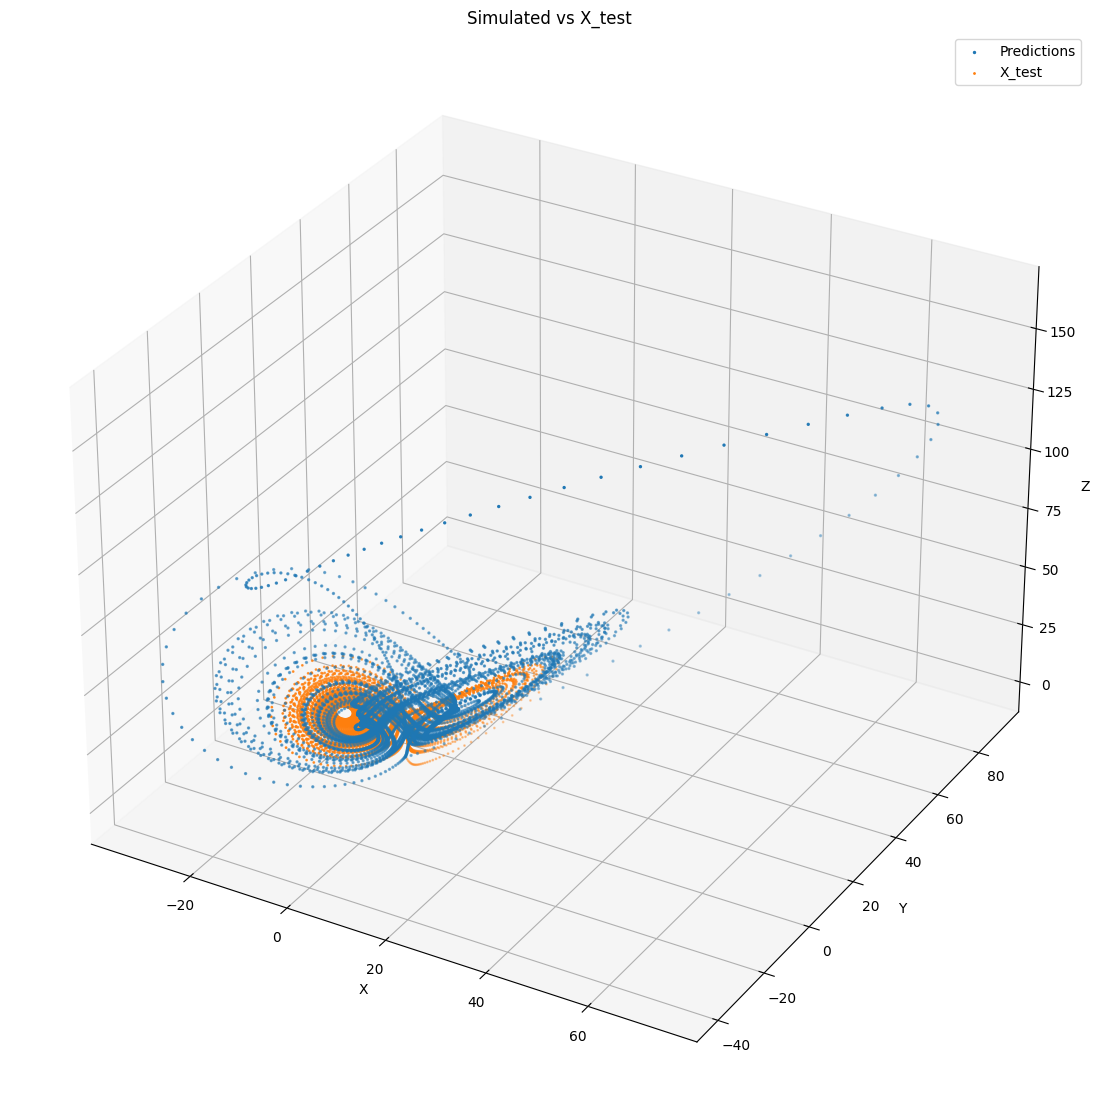

In [98]:
# Extract the x, y, z coordinates from predictions_plt
x_pred = trajectories_np[:,:, :, 0]
y_pred = trajectories_np[:,:, :, 1]
z_pred = trajectories_np[:,:, :, 2]

# Extract the x, y, z coordinates from X_train_plt
x_train = test[0][:, :, 0].cpu()
y_train = test[0][ :, :, 1].cpu()
z_train = test[0][ :, :, 2].cpu()

# Create a 3D plot
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pred, y_pred, z_pred, label='Predictions',s=2)
ax.scatter(x_train, y_train, z_train, label='X_test',s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Simulated vs X_test')
ax.legend()

# Show the plot
plt.show()

In [99]:
x_pred.shape

(1, 5000, 1)

In [100]:
x_pred.shape

(1, 5000, 1)

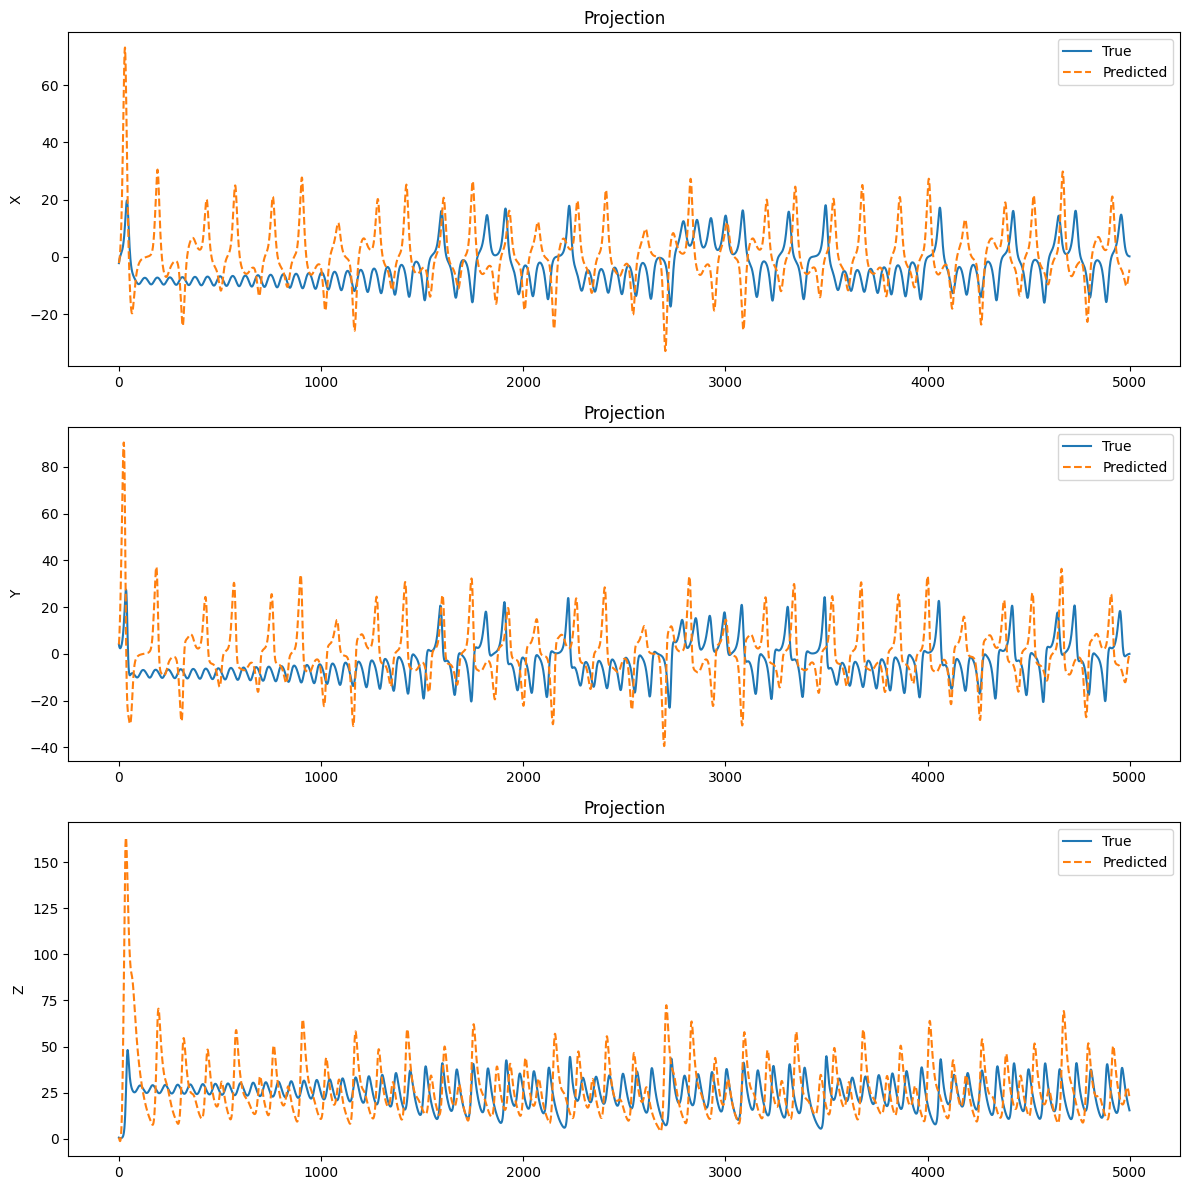

In [101]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
ax[0].plot(x_train, label='True')
ax[0].plot(x_pred[0,:,:], label='Predicted',linestyle='--')
ax[0].set_ylabel('X')
#ax[0].set_xlim(0, 30)
ax[0].set_title('Projection')
ax[0].legend()

ax[1].plot(y_train, label='True')
ax[1].plot(y_pred[0,:,0], label='Predicted',linestyle='--')
ax[1].set_ylabel('Y')
ax[1].set_title('Projection')
ax[1].legend()

ax[2].plot(z_train, label='True')
ax[2].plot(z_pred[0,:,0], label='Predicted',linestyle='--')
ax[2].set_ylabel('Z')
#ax[2].set_xlim(0, 400)
ax[2].set_title('Projection')
ax[2].legend()

plt.tight_layout()
plt.show()

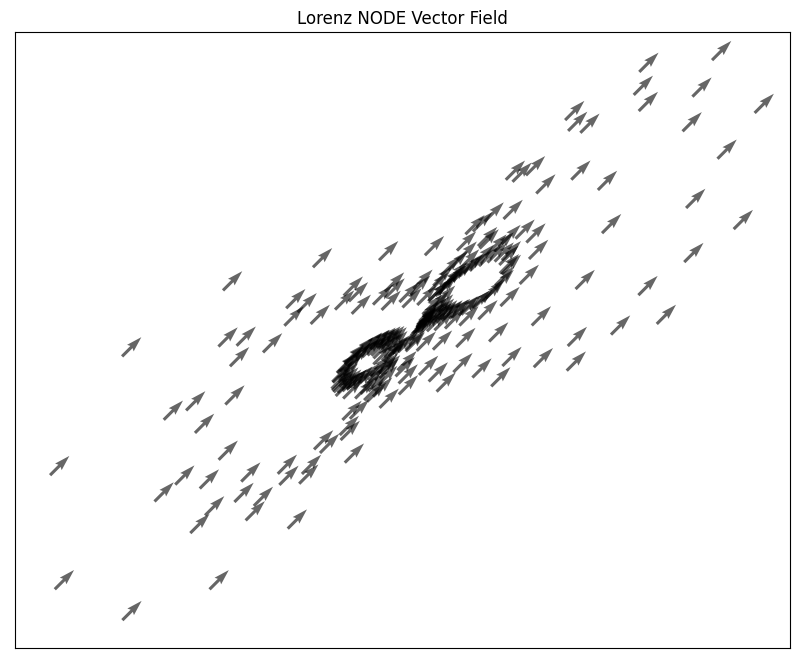

In [102]:
positions = pred_2[:, 0, :]  # Extracting the 3 components as positions

# Create a new tensor with requires_grad=True
positions = positions.clone().detach().requires_grad_(True)

# Calculate the vector field by taking the derivatives of positions
vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Move tensors to CPU before converting to NumPy arrays
positions = positions.cpu().detach().numpy()
U = U.cpu().detach().numpy()
V = V.cpu().detach().numpy()
W = W.cpu().detach().numpy()

# Create a subset of positions for the arrows
arrow_step = 20  # Adjust this to change the density of arrows
arrow_positions = positions[::arrow_step]

# Calculate arrow directions by normalizing the vector field components
magnitude = np.sqrt(U**2 + V**2 + W**2)
arrow_U = U / magnitude
arrow_V = V / magnitude

# Plot the vector field with arrows
fig, ax = plt.subplots(figsize=(10, 8))
ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xlabel('')   # Remove x-axis label
ax.set_ylabel('')   # Remove y-axis label
plt.title('Lorenz NODE Vector Field')
plt.show()

In [103]:
def evaluate(model, input_seq, t,test_data,visualizer=visualize):
    preds = []
    losses = []
    for idx in range(len(test_data)):
        num_trajectories = 1  # Number of trajectories to simulate
        trajectories = []
        input_seq = test_data[idx][0]
        with torch.no_grad():
            # Propagate the initial point forward in time
            predicted_trajectory = odeint(test_model, input_seq.to(device), t)
            test_0_loss = F.mse_loss(predicted_trajectory, test[idx].to(device))
            trajectories.append(predicted_trajectory.cpu().numpy())
        torch.save(test_0_loss,f'test_{idx}_loss_NODE.pt')   
        # Convert the tensors to NumPy arrays for plotting
        trajectories_np = np.array(trajectories)
    return preds,losses

In [104]:
def evaluate(model,t,test_data,visualizer=visualize):
    preds = []
    losses = []
    for idx in range(len(test_data)):
        num_trajectories = 1  # Number of trajectories to simulate
        trajectories = []
        input_seq = test_data[idx][0]
        with torch.no_grad():
            # Propagate the initial point forward in time
            predicted_trajectory = odeint(test_model, input_seq.to(device), t)
            test_0_loss = F.mse_loss(predicted_trajectory, test[idx].to(device))
            trajectories.append(predicted_trajectory.cpu().numpy())
        torch.save(test_0_loss,f'test_{idx}_loss_NODE.pt')   
        # Convert the tensors to NumPy arrays for plotting
        trajectories_np = np.array(trajectories)
    return preds,losses

In [105]:
pred,losses = evaluate(test_model,t,test)

In [106]:
preds

In [107]:
pred

[]

In [108]:
losses

[]

In [109]:
def evaluate(model,t,test_data,visualizer=visualize):
    preds = []
    losses = []
    for idx in range(len(test_data)):
        num_trajectories = 1  # Number of trajectories to simulate
        trajectories = []
        input_seq = test_data[idx][0]
        with torch.no_grad():
            # Propagate the initial point forward in time
            predicted_trajectory = odeint(test_model, input_seq.to(device), t)
            test_0_loss = F.mse_loss(predicted_trajectory, test[idx].to(device))
            trajectories.append(predicted_trajectory.cpu().numpy())
        losses.append(test_0_loss.item())
        preds.append(predicted_trajectory.cpu().numpy())
        torch.save(test_0_loss,f'test_{idx}_loss_NODE.pt')   
        # Convert the tensors to NumPy arrays for plotting
        trajectories_np = np.array(trajectories)
    return preds,losses

In [110]:
pred,losses = evaluate(test_model,t,test)

In [111]:
losses

[233.31703186035156, 226.2588348388672, 247.7700958251953]

In [112]:
pred[0].shape

(5000, 1, 3)

In [113]:
pred[1].shape

(5000, 1, 3)

In [114]:
pred[2].shape

(5000, 1, 3)

In [115]:
def evaluate(model,t,test_data,visualizer=visualize):
    preds = []
    losses = []
    for idx in range(len(test_data)):
        num_trajectories = 1  # Number of trajectories to simulate
        trajectories = []
        input_seq = test_data[idx][0]
        with torch.no_grad():
            # Propagate the initial point forward in time
            predicted_trajectory = odeint(test_model, input_seq.to(device), t)
            test_0_loss = F.mse_loss(predicted_trajectory, test[idx].to(device))
            trajectories.append(predicted_trajectory.cpu().numpy())
        losses.append(test_0_loss.item())
        preds.append(predicted_trajectory.cpu().numpy())
        torch.save(test_0_loss,f'test_{idx}_loss_NODE.pt')   
        # Convert the tensors to NumPy arrays for plotting
        trajectories_np = np.array(trajectories)
        # Extract the x, y, z coordinates from predictions_plt
        x_pred = trajectories_np[:,:, :, 0]
        y_pred = trajectories_np[:,:, :, 1]
        z_pred = trajectories_np[:,:, :, 2]

        # Extract the x, y, z coordinates from X_train_plt
        x_train = test[idx][:, :, 0].cpu()
        y_train = test[idx][ :, :, 1].cpu()
        z_train = test[idx][ :, :, 2].cpu()

        plt.clf()
        # Create a 3D plot
        fig = plt.figure(figsize=(14,14))
        
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x_pred, y_pred, z_pred, label='Predictions',s=2)
        ax.scatter(x_train, y_train, z_train, label='X_test',s=1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Simulation vs Test{idx} Lorenz Attractor')
        ax.legend()

        # Show the plot
        plt.savefig(f'PNG/test_{idx}_NODE.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.show()
        
        plt.clf()
        fig, ax = plt.subplots(3, 1, figsize=(12, 12))
        
        ax[0].plot(x_train, label='True')
        ax[0].plot(x_pred[0,:,:], label='Predicted',linestyle='--')
        ax[0].set_ylabel('X')
        #ax[0].set_xlim(0, 30)
        ax[0].set_title('Projection')
        ax[0].legend()

        ax[1].plot(y_train, label='True')
        ax[1].plot(y_pred[0,:,0], label='Predicted',linestyle='--')
        ax[1].set_ylabel('Y')
        ax[1].set_title('Projection')
        ax[1].legend()

        ax[2].plot(z_train, label='True')
        ax[2].plot(z_pred[0,:,0], label='Predicted',linestyle='--')
        ax[2].set_ylabel('Z')
        #ax[2].set_xlim(0, 400)
        ax[2].set_title('Projection')
        ax[2].legend()

        plt.tight_layout()
        plt.savefig(f'PNG/test_{idx}_NODE_Projection.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.show()

        
    return preds,losses

<Figure size 640x480 with 0 Axes>

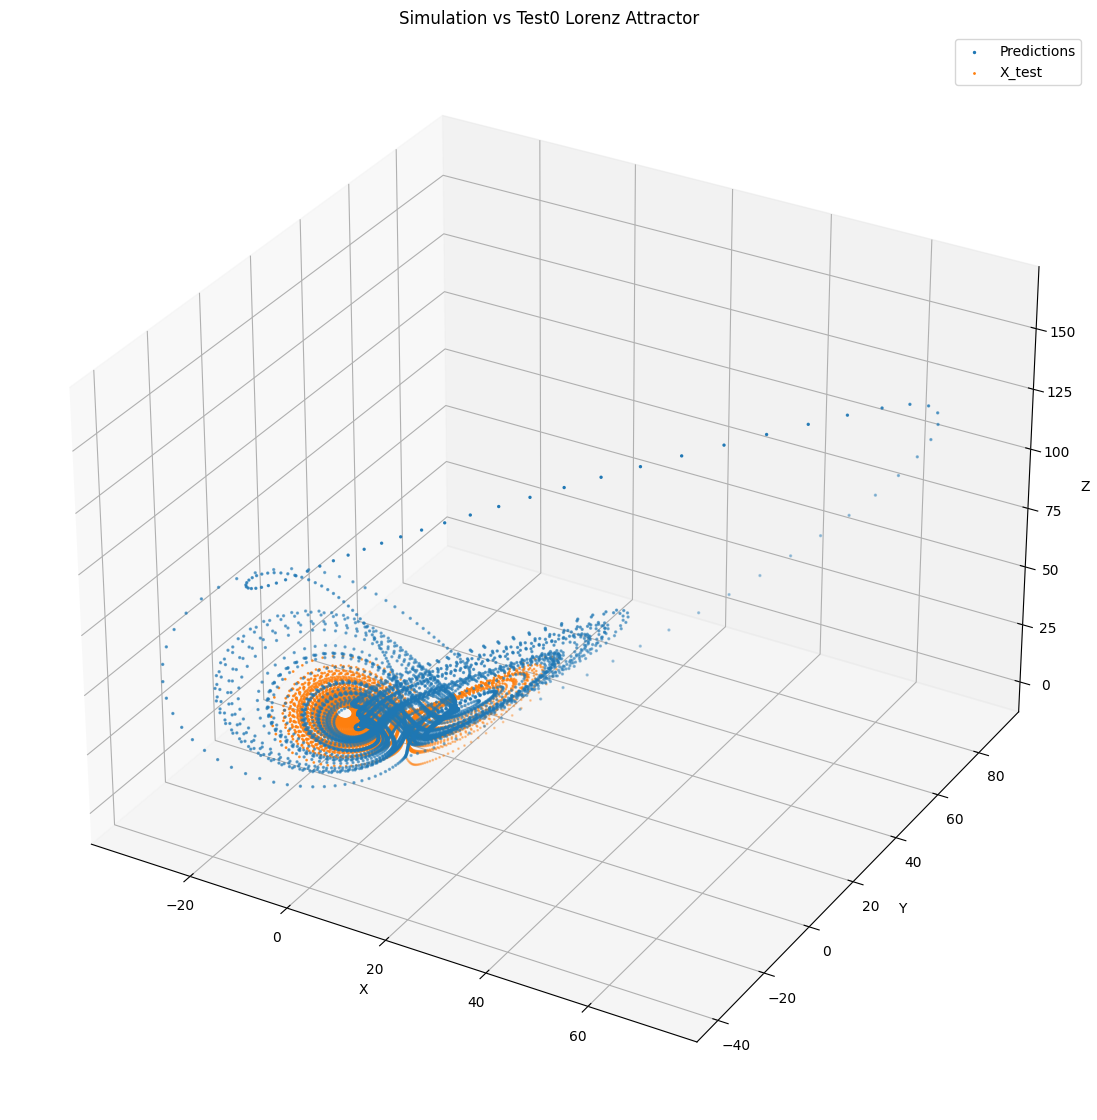

<Figure size 640x480 with 0 Axes>

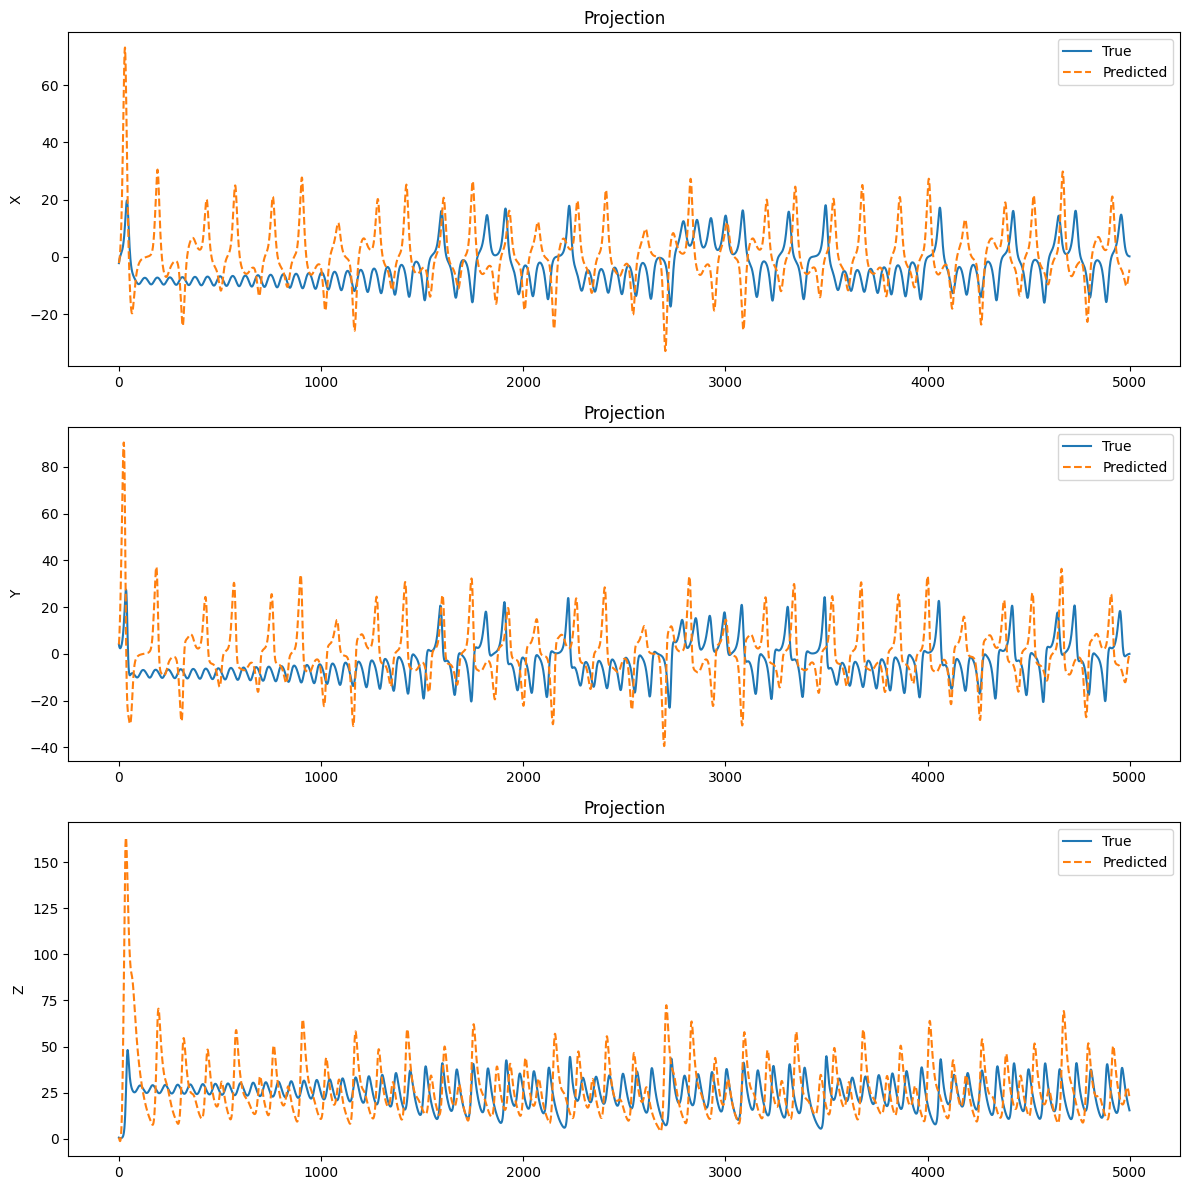

<Figure size 640x480 with 0 Axes>

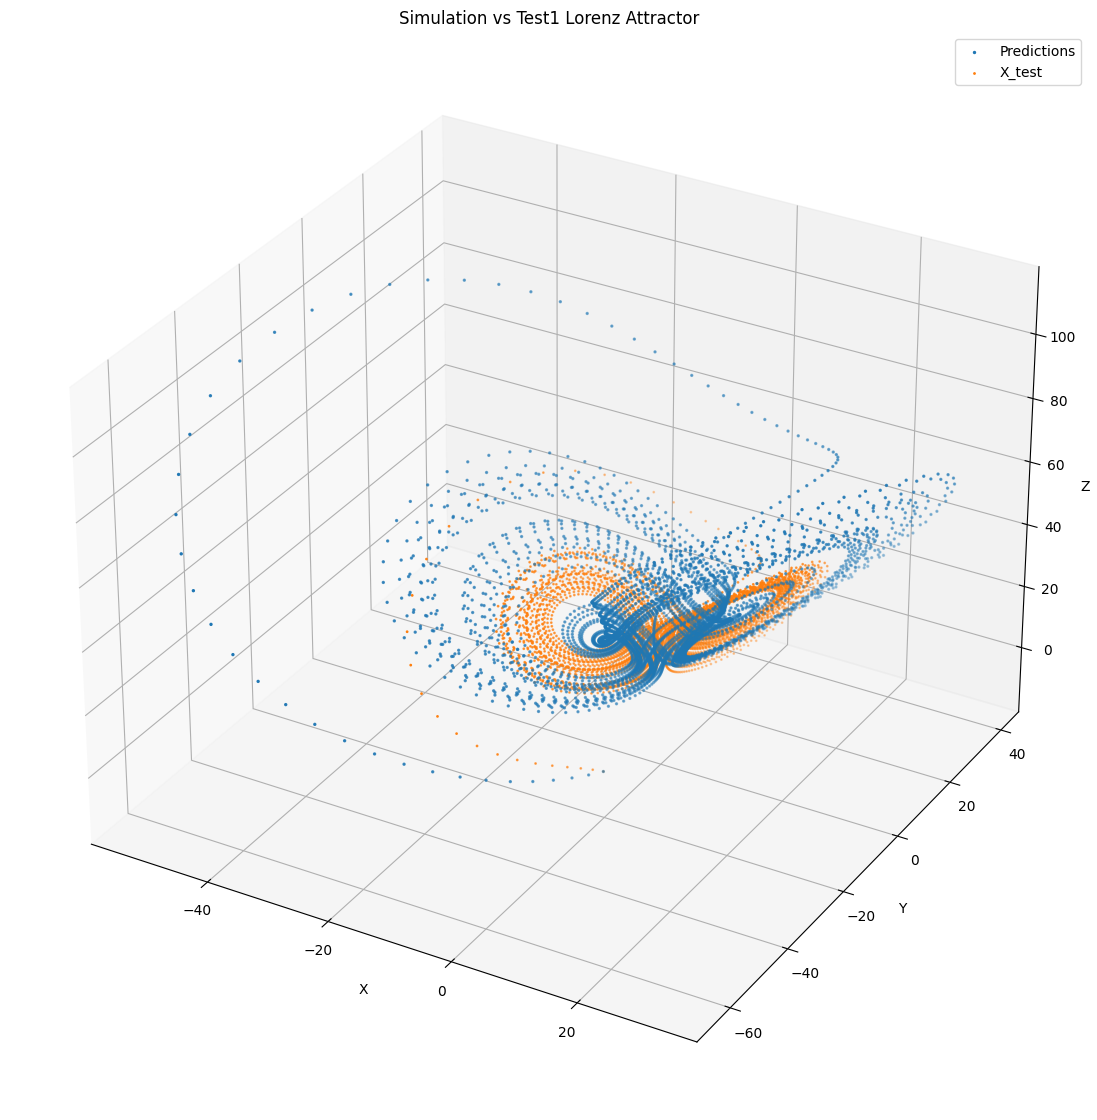

<Figure size 640x480 with 0 Axes>

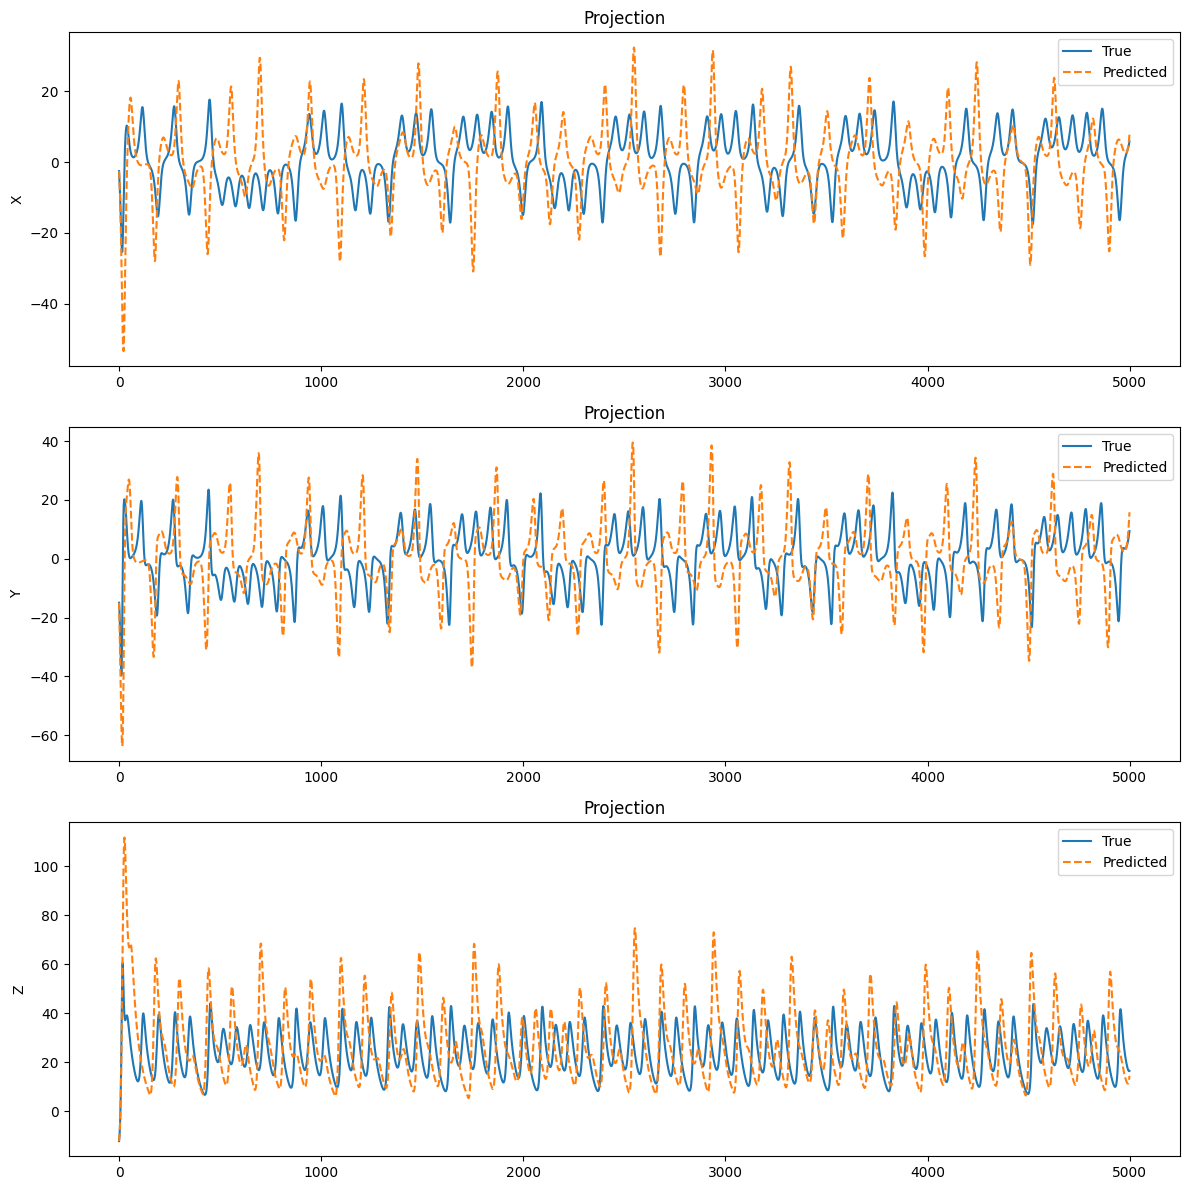

<Figure size 640x480 with 0 Axes>

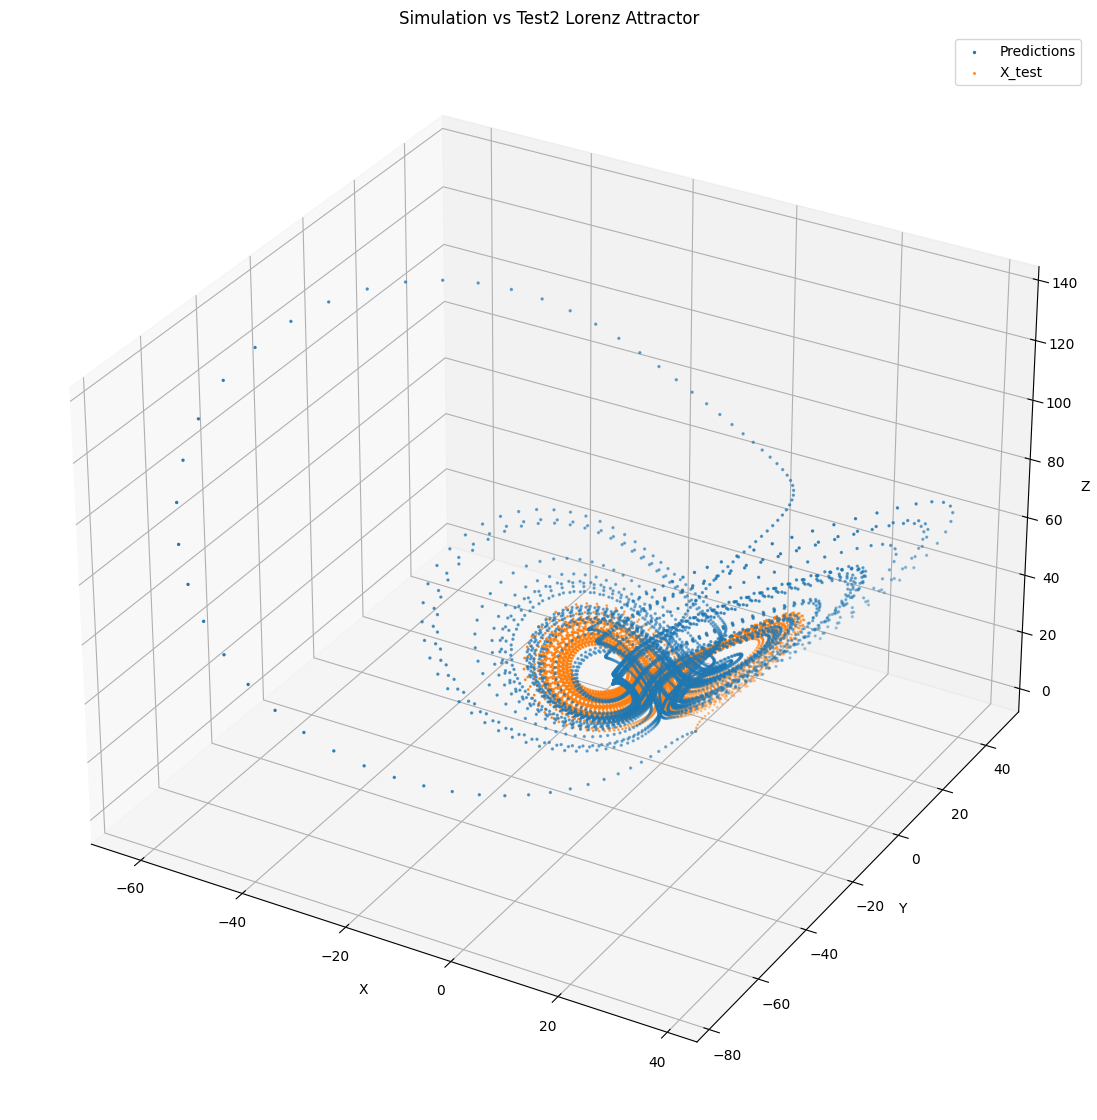

<Figure size 640x480 with 0 Axes>

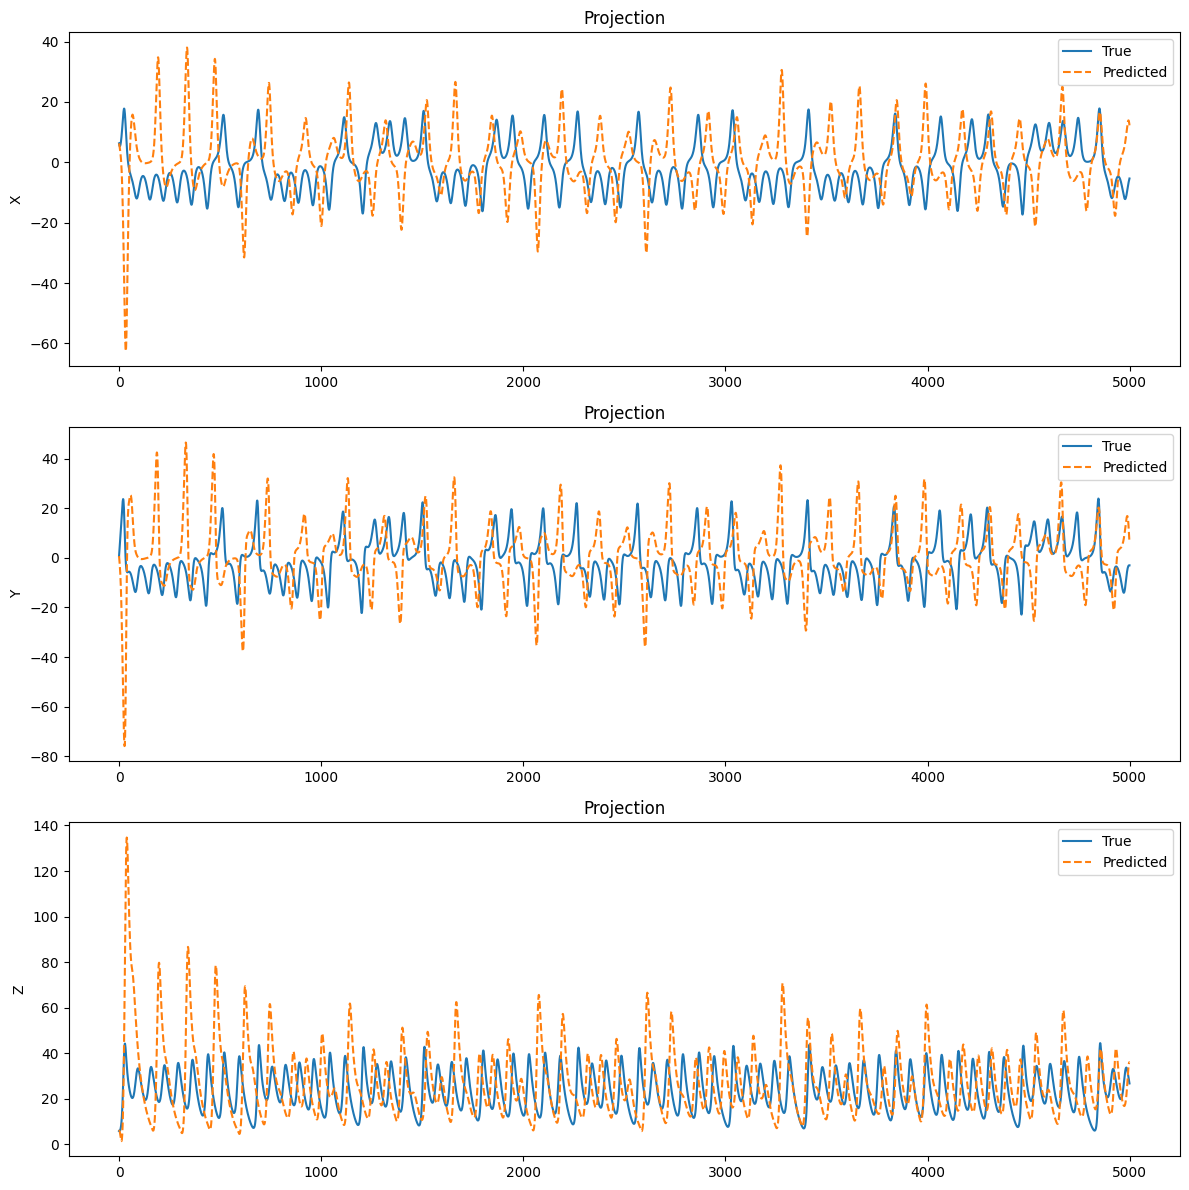

In [116]:
pred,losses = evaluate(test_model,t,test)

In [117]:
losses

[233.31703186035156, 226.2588348388672, 247.7700958251953]

In [118]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 20  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title('Lorenz NODE Vector Field')
        plt.show()

In [119]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 20  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field{idx}')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.show()

In [120]:
plot_vector_field(pred)

In [121]:
type(pred[0])

numpy.ndarray

In [122]:
def evaluate(model,t,test_data,visualizer=visualize):
    preds = []
    losses = []
    for idx in range(len(test_data)):
        num_trajectories = 1  # Number of trajectories to simulate
        trajectories = []
        input_seq = test_data[idx][0]
        with torch.no_grad():
            # Propagate the initial point forward in time
            predicted_trajectory = odeint(test_model, input_seq.to(device), t)
            test_0_loss = F.mse_loss(predicted_trajectory, test[idx].to(device))
            trajectories.append(predicted_trajectory.cpu().numpy())
        losses.append(test_0_loss.item())
        preds.append(predicted_trajectory.cpu())
        torch.save(test_0_loss,f'test_{idx}_loss_NODE.pt')   
        # Convert the tensors to NumPy arrays for plotting
        trajectories_np = np.array(trajectories)
        # Extract the x, y, z coordinates from predictions_plt
        x_pred = trajectories_np[:,:, :, 0]
        y_pred = trajectories_np[:,:, :, 1]
        z_pred = trajectories_np[:,:, :, 2]

        # Extract the x, y, z coordinates from X_train_plt
        x_train = test[idx][:, :, 0].cpu()
        y_train = test[idx][ :, :, 1].cpu()
        z_train = test[idx][ :, :, 2].cpu()

        plt.clf()
        # Create a 3D plot
        fig = plt.figure(figsize=(14,14))
        
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x_pred, y_pred, z_pred, label='Predictions',s=2)
        ax.scatter(x_train, y_train, z_train, label='X_test',s=1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Simulation vs Test{idx} Lorenz Attractor')
        ax.legend()

        # Show the plot
        plt.savefig(f'PNG/test_{idx}_NODE.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.show()
        
        plt.clf()
        fig, ax = plt.subplots(3, 1, figsize=(12, 12))
        
        ax[0].plot(x_train, label='True')
        ax[0].plot(x_pred[0,:,:], label='Predicted',linestyle='--')
        ax[0].set_ylabel('X')
        #ax[0].set_xlim(0, 30)
        ax[0].set_title('Projection')
        ax[0].legend()

        ax[1].plot(y_train, label='True')
        ax[1].plot(y_pred[0,:,0], label='Predicted',linestyle='--')
        ax[1].set_ylabel('Y')
        ax[1].set_title('Projection')
        ax[1].legend()

        ax[2].plot(z_train, label='True')
        ax[2].plot(z_pred[0,:,0], label='Predicted',linestyle='--')
        ax[2].set_ylabel('Z')
        #ax[2].set_xlim(0, 400)
        ax[2].set_title('Projection')
        ax[2].legend()

        plt.tight_layout()
        plt.savefig(f'PNG/test_{idx}_NODE_Projection.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.show()

        
    return preds,losses

<Figure size 640x480 with 0 Axes>

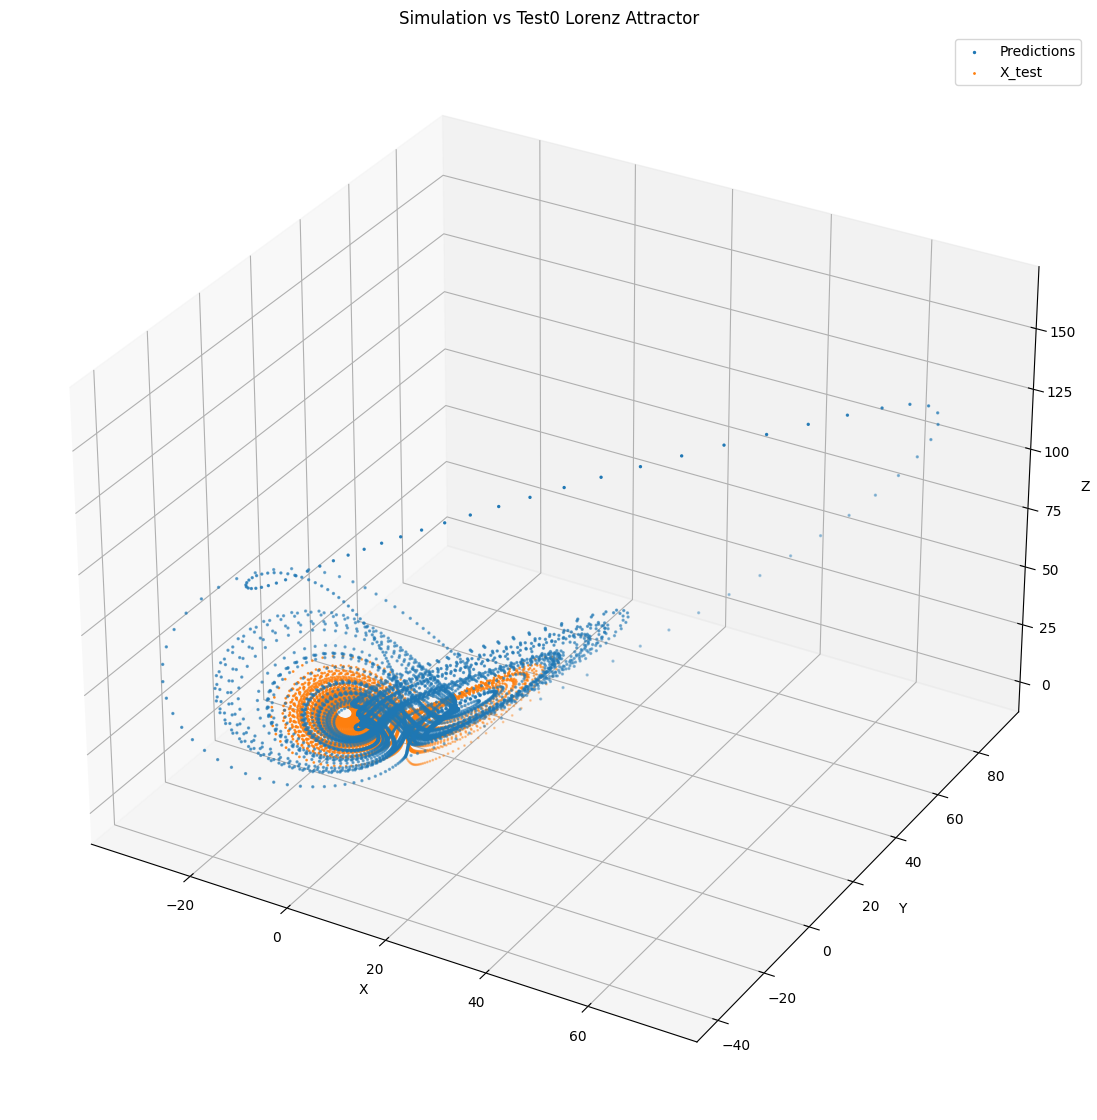

<Figure size 640x480 with 0 Axes>

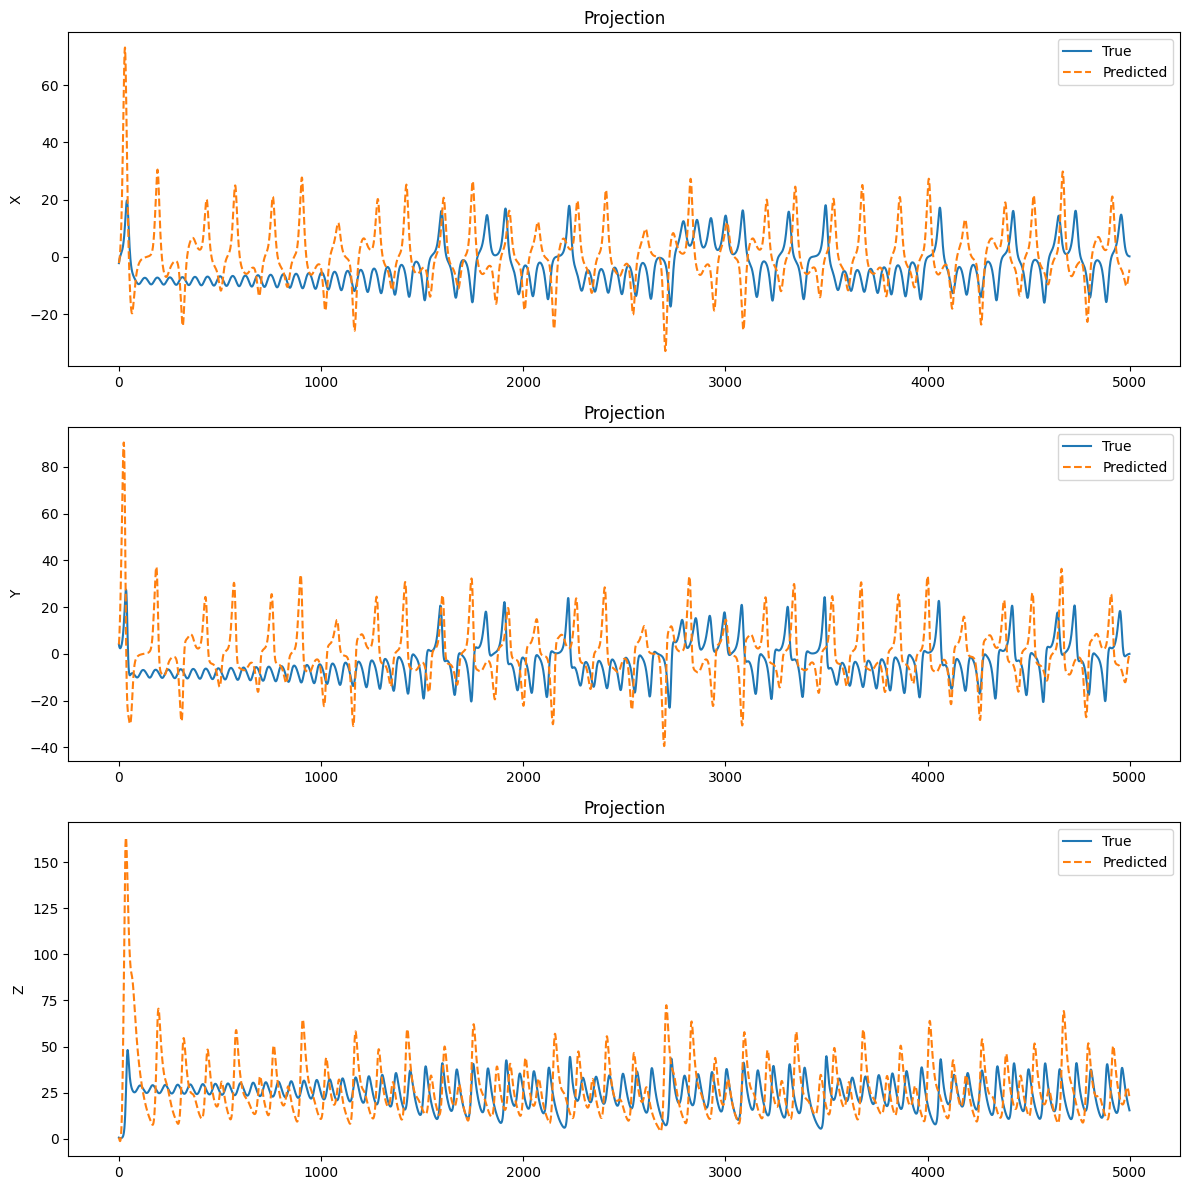

<Figure size 640x480 with 0 Axes>

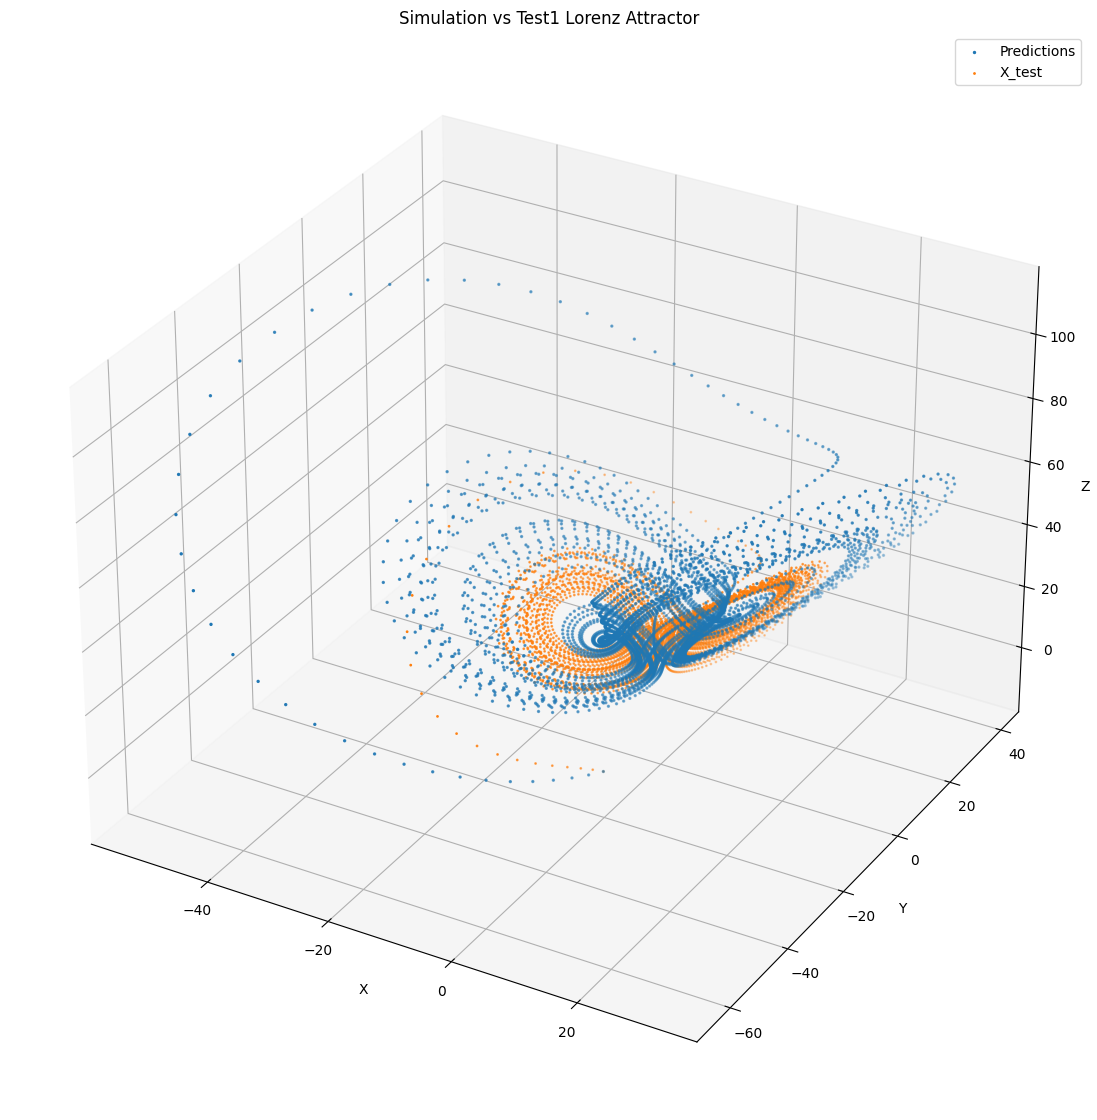

<Figure size 640x480 with 0 Axes>

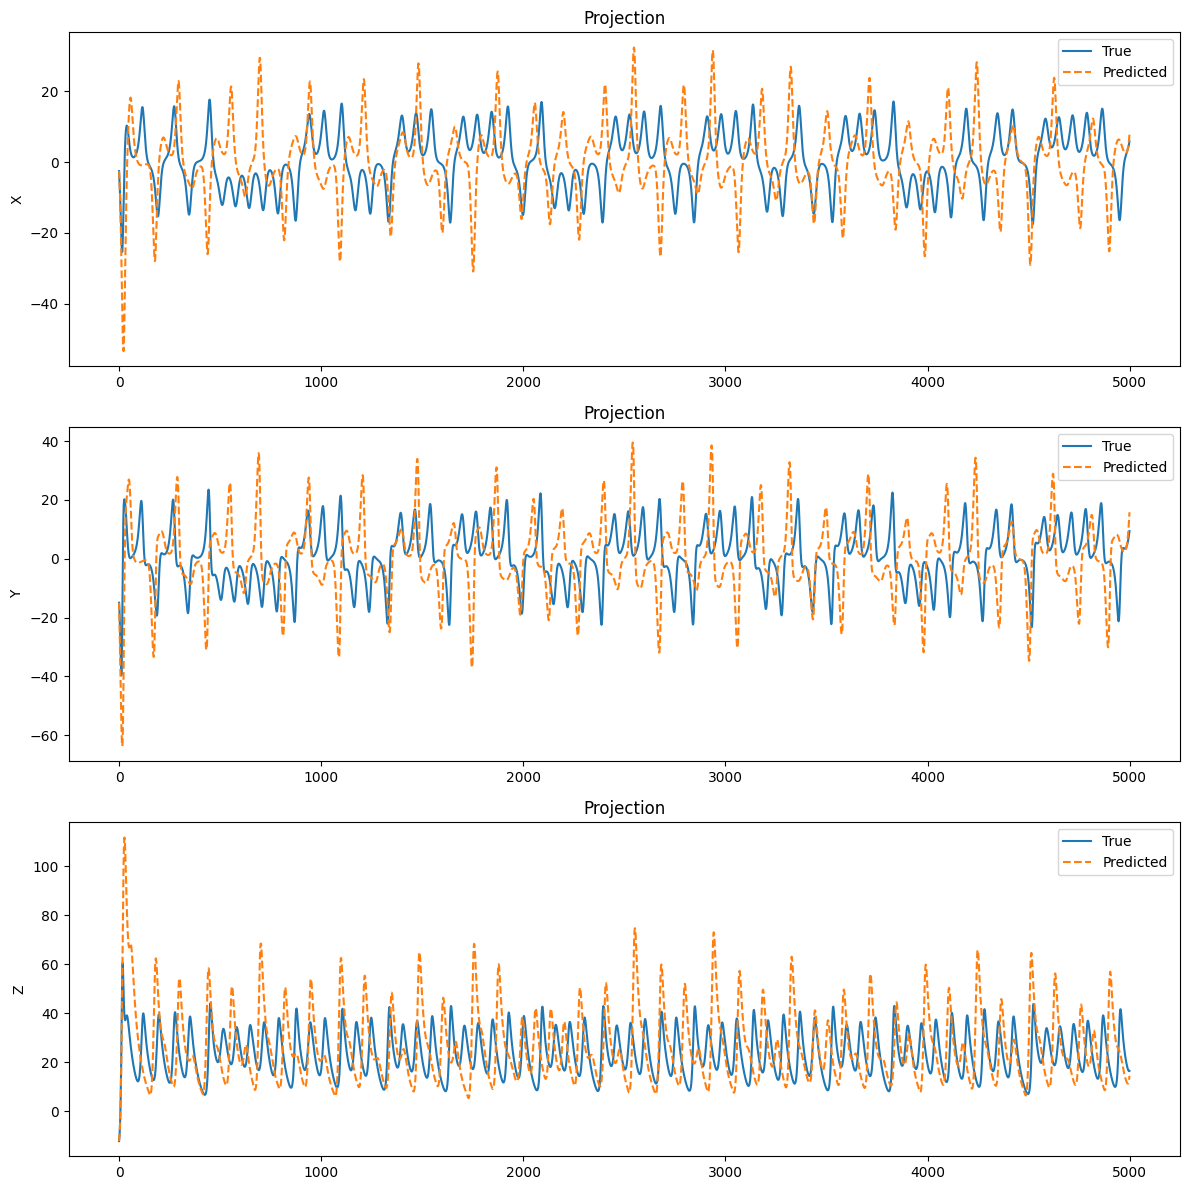

<Figure size 640x480 with 0 Axes>

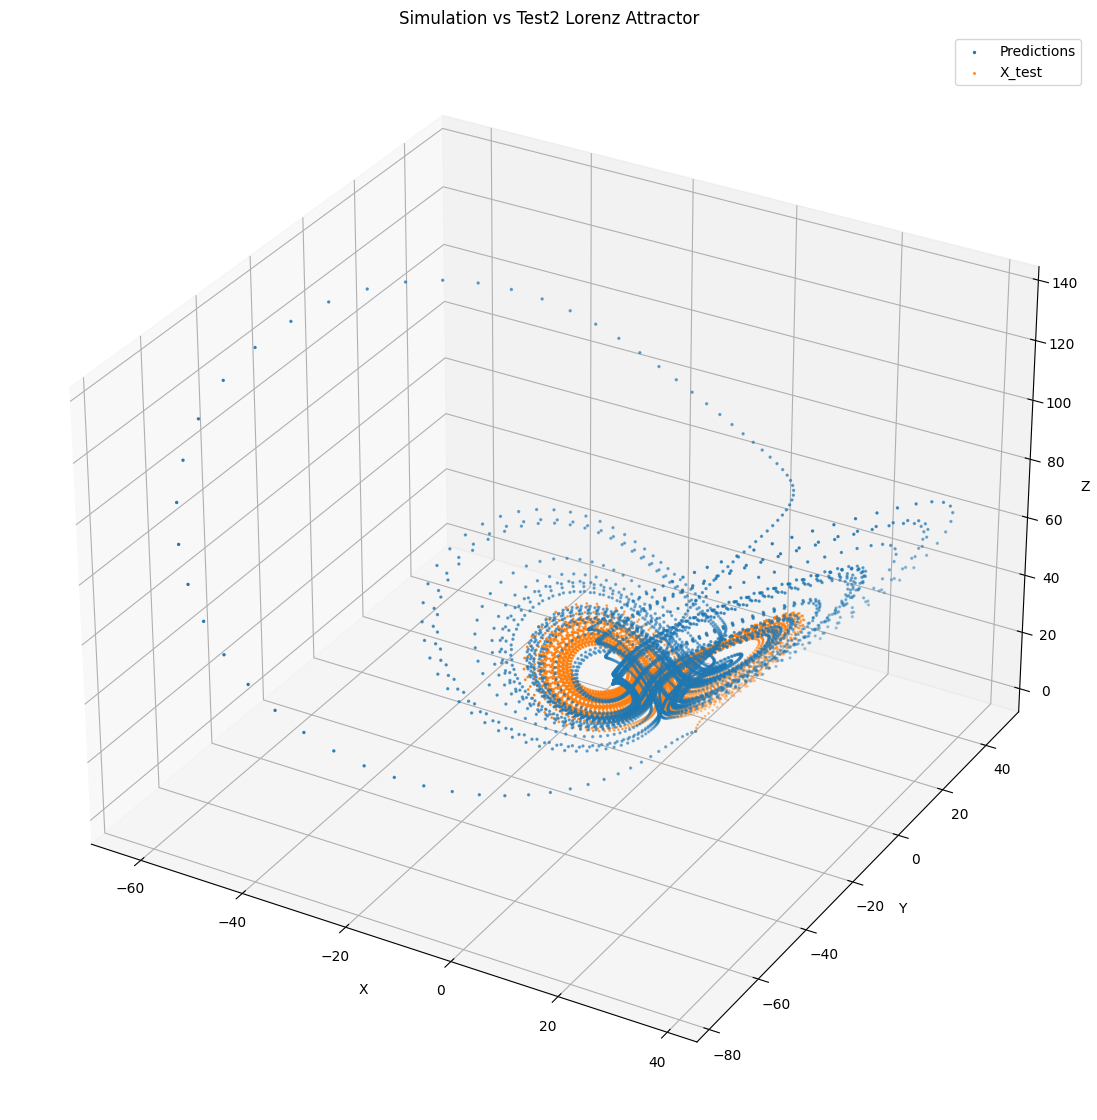

<Figure size 640x480 with 0 Axes>

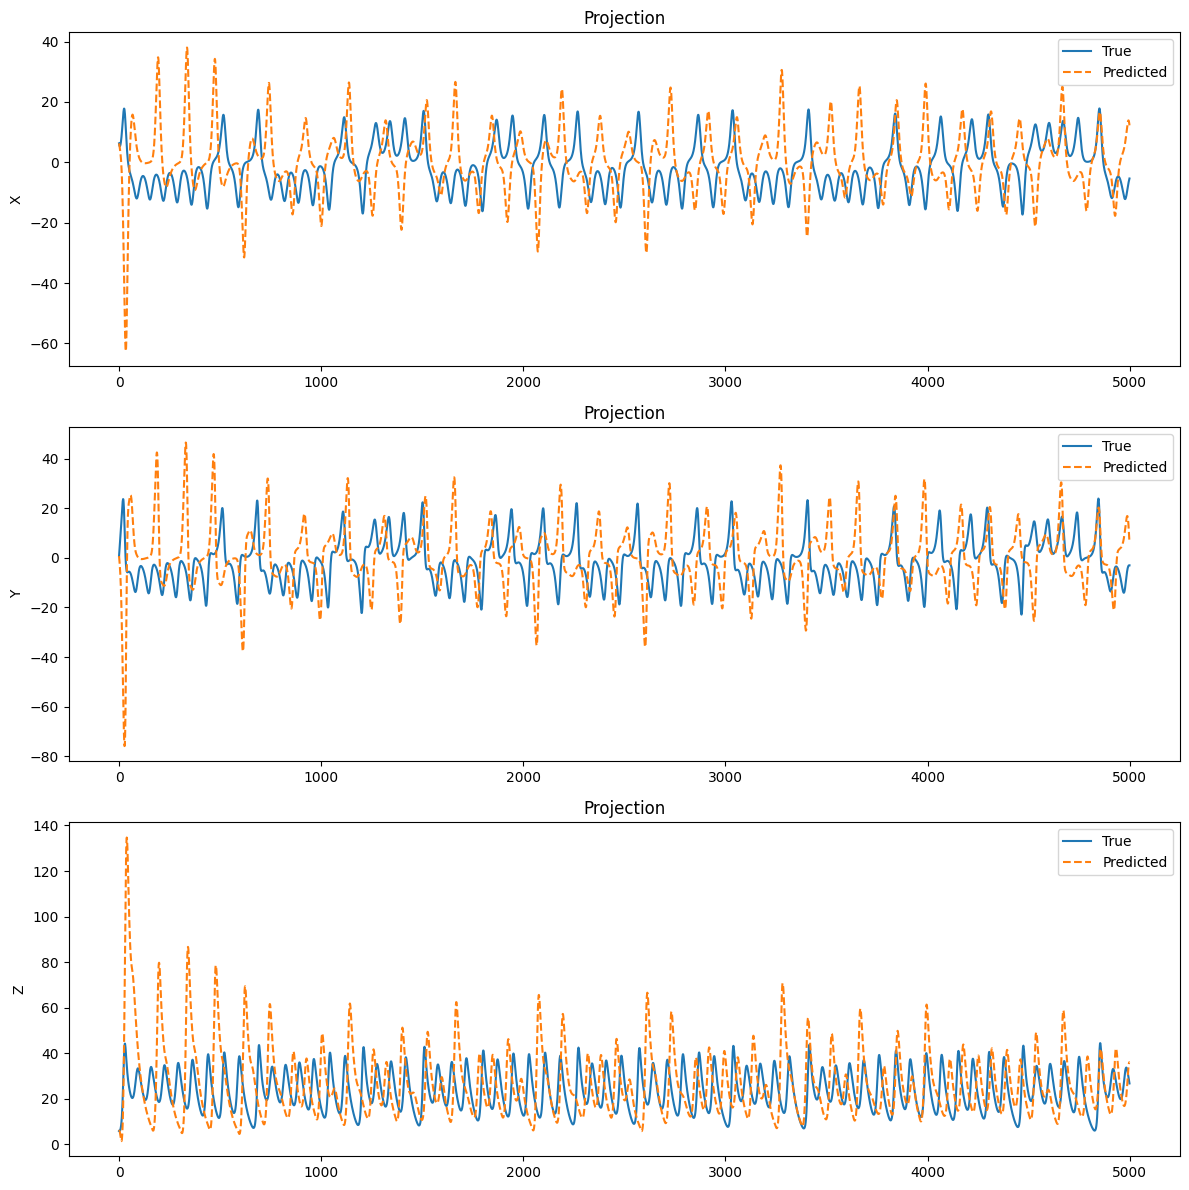

In [123]:
pred,losses = evaluate(test_model,t,test)

In [124]:
def evaluate(model,t,test_data,visualizer=visualize):
    preds = []
    losses = []
    for idx in range(len(test_data)):
        num_trajectories = 1  # Number of trajectories to simulate
        trajectories = []
        input_seq = test_data[idx][0]
        with torch.no_grad():
            # Propagate the initial point forward in time
            predicted_trajectory = odeint(test_model, input_seq.to(device), t)
            test_0_loss = F.mse_loss(predicted_trajectory, test[idx].to(device))
            trajectories.append(predicted_trajectory.cpu().numpy())
        losses.append(test_0_loss.item())
        preds.append(predicted_trajectory.cpu())
        torch.save(test_0_loss,f'test_{idx}_loss_NODE.pt')   
        # Convert the tensors to NumPy arrays for plotting
        trajectories_np = np.array(trajectories)
        # Extract the x, y, z coordinates from predictions_plt
        x_pred = trajectories_np[:,:, :, 0]
        y_pred = trajectories_np[:,:, :, 1]
        z_pred = trajectories_np[:,:, :, 2]

        # Extract the x, y, z coordinates from X_train_plt
        x_train = test[idx][:, :, 0].cpu()
        y_train = test[idx][ :, :, 1].cpu()
        z_train = test[idx][ :, :, 2].cpu()

        plt.clf()
        # Create a 3D plot
        fig = plt.figure(figsize=(14,14))
        
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x_pred, y_pred, z_pred, label='Predictions',s=2)
        ax.scatter(x_train, y_train, z_train, label='X_test',s=1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Simulation vs Test{idx} Lorenz Attractor')
        ax.legend()

        # Show the plot
        plt.savefig(f'PNG/test_{idx}_NODE.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.show()
        
        plt.clf()
        fig, ax = plt.subplots(3, 1, figsize=(12, 12))
        
        ax[0].plot(x_train, label='True')
        ax[0].plot(x_pred[0,:,:], label='Predicted',linestyle='--')
        ax[0].set_ylabel('X')
        #ax[0].set_xlim(0, 30)
        ax[0].set_title('Projection')
        ax[0].legend()

        ax[1].plot(y_train, label='True')
        ax[1].plot(y_pred[0,:,0], label='Predicted',linestyle='--')
        ax[1].set_ylabel('Y')
        ax[1].set_title('Projection')
        ax[1].legend()

        ax[2].plot(z_train, label='True')
        ax[2].plot(z_pred[0,:,0], label='Predicted',linestyle='--')
        ax[2].set_ylabel('Z')
        #ax[2].set_xlim(0, 400)
        ax[2].set_title('Projection')
        ax[2].legend()
        ax.set_title(f'Projection on Test{idx} Data')
        plt.tight_layout()
        plt.savefig(f'PNG/test_{idx}_NODE_Projection.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.show()

        
    return preds,losses

In [125]:
losses

[233.31703186035156, 226.2588348388672, 247.7700958251953]

In [126]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 20  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field{idx}')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.show()

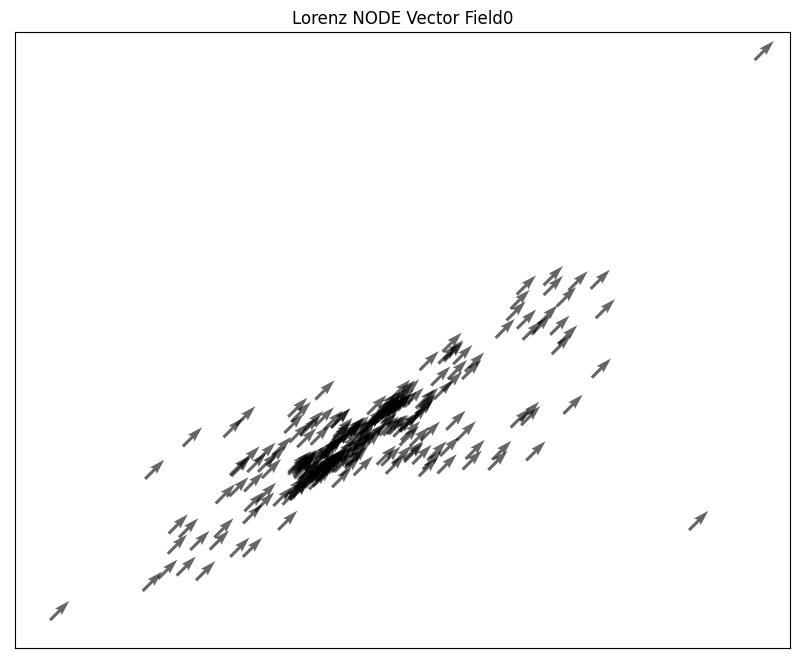

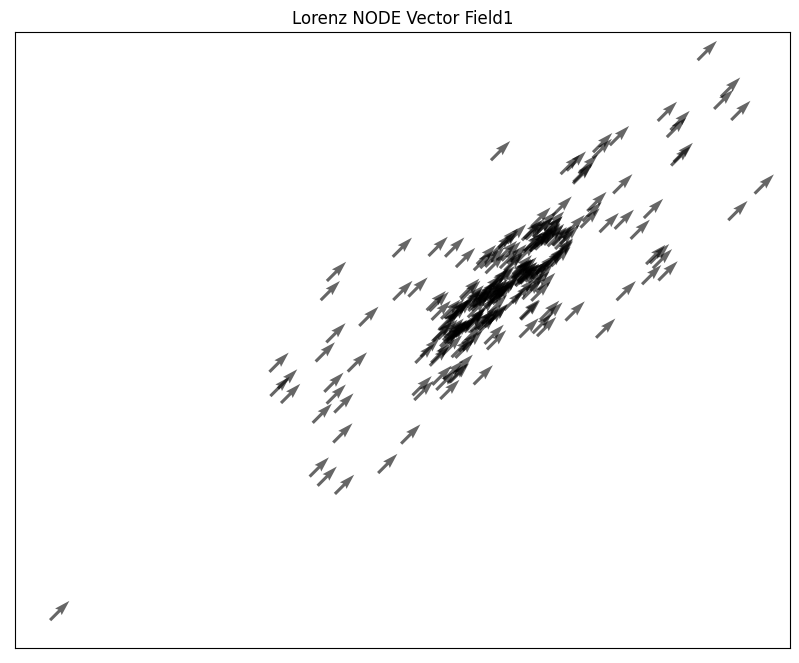

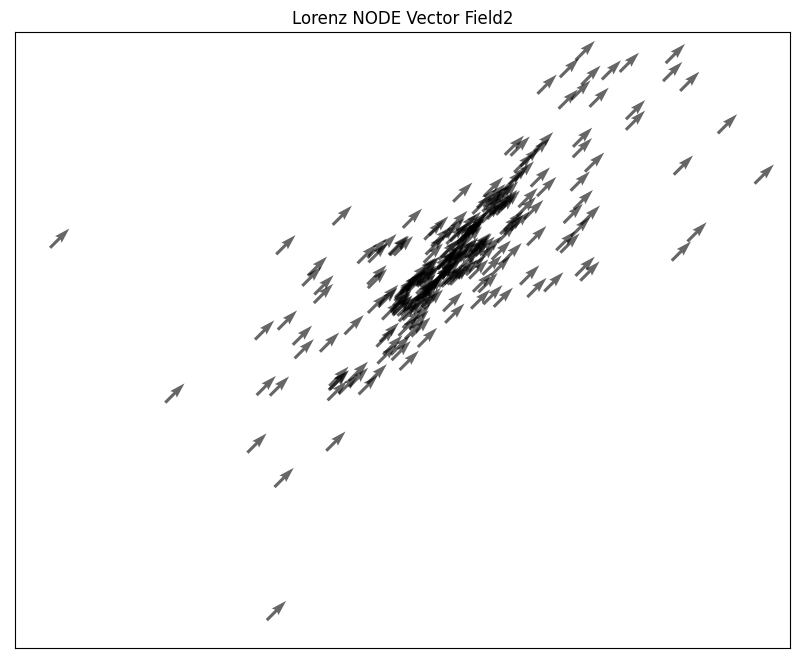

In [127]:
plot_vector_field(pred)

In [128]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field{idx}')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.show()

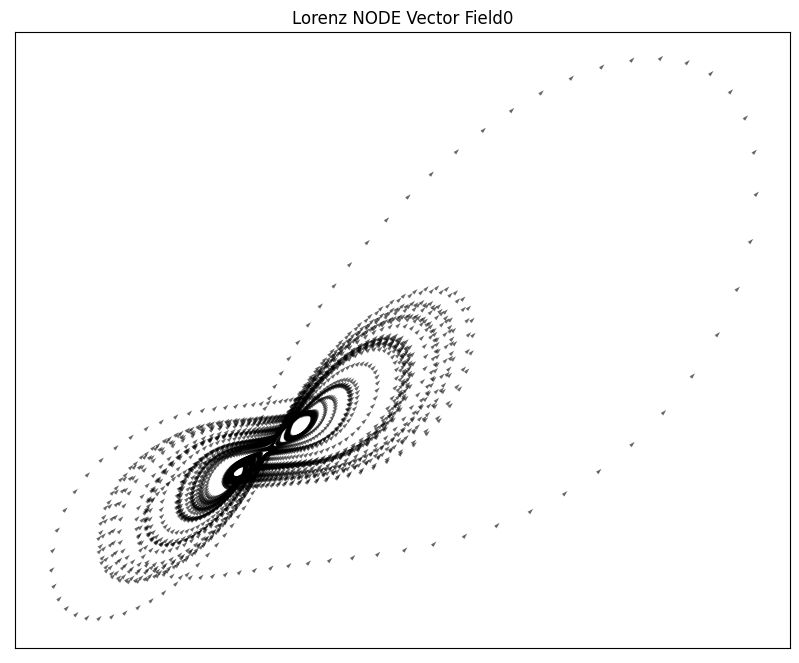

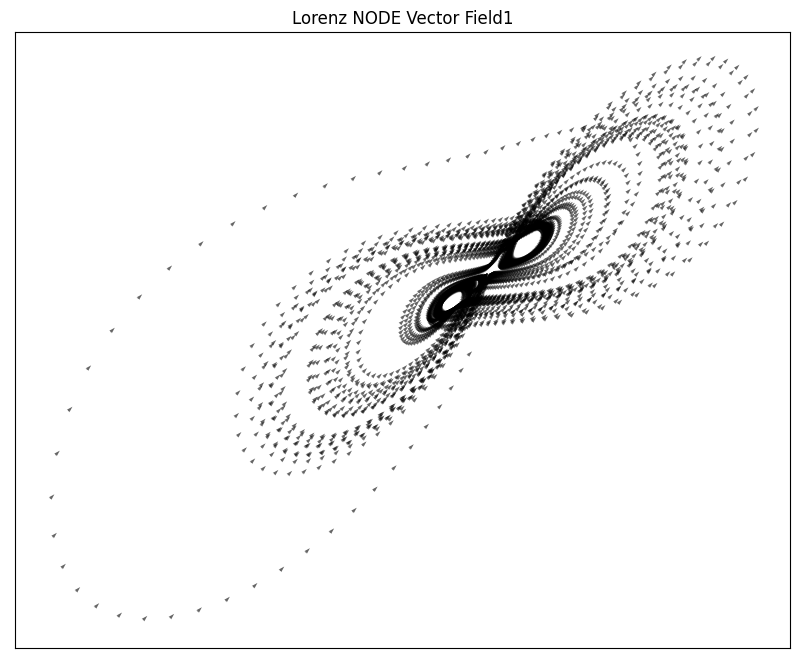

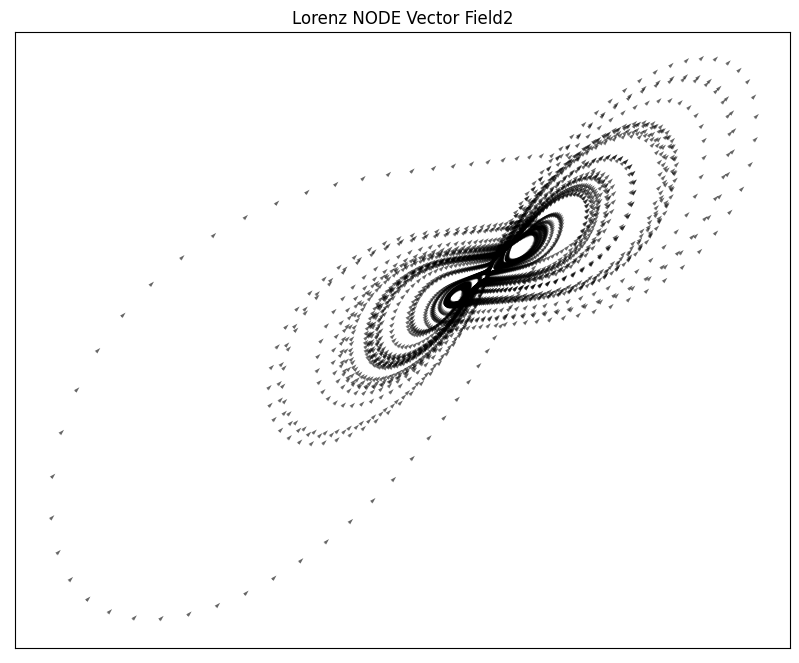

In [129]:
plot_vector_field(pred)

In [130]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field of Test{idx} Data')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.show()

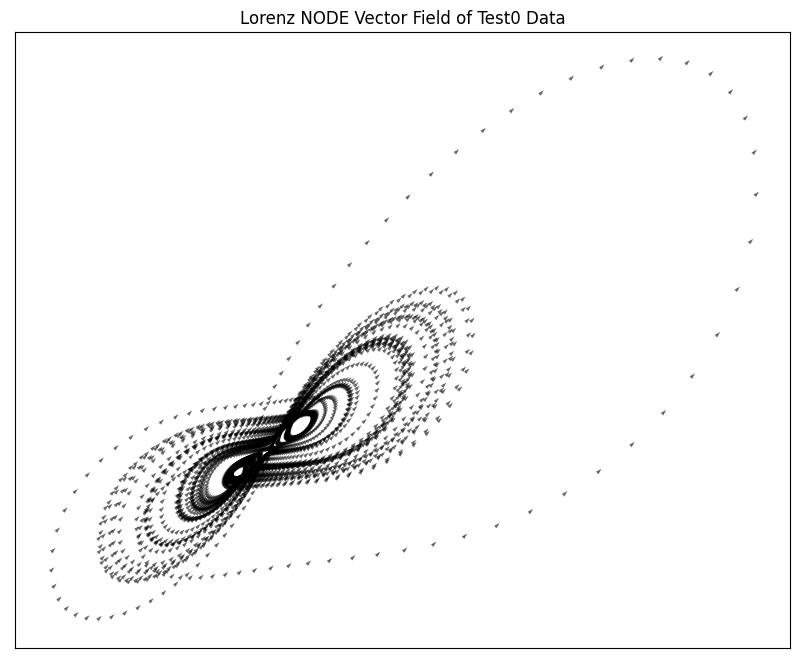

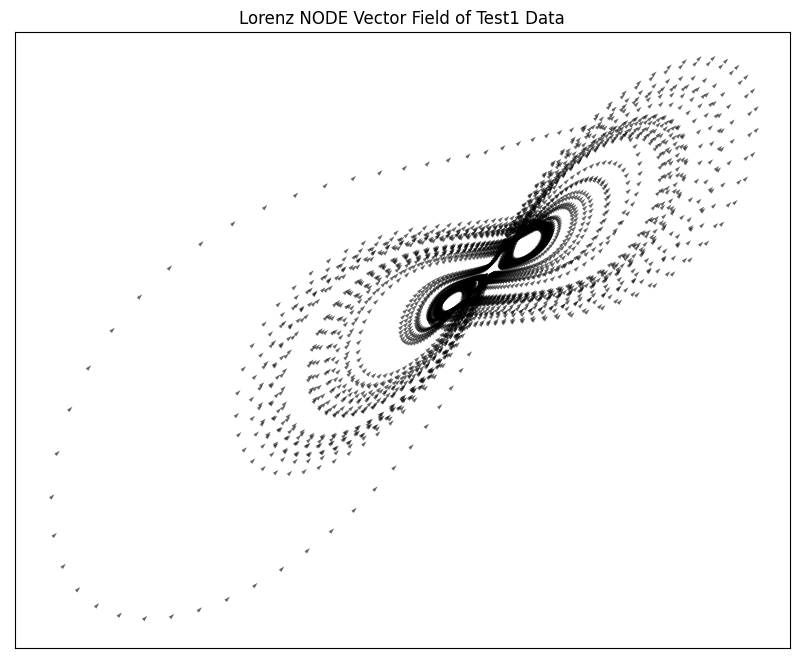

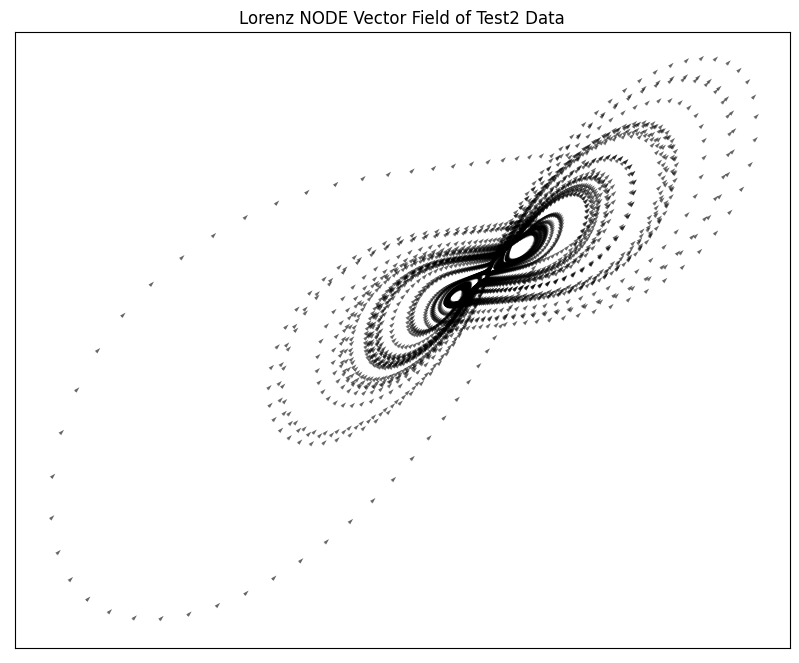

In [131]:
plot_vector_field(pred)

In [132]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field of Test{idx} Data')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.tight_layout()
        plt.show()

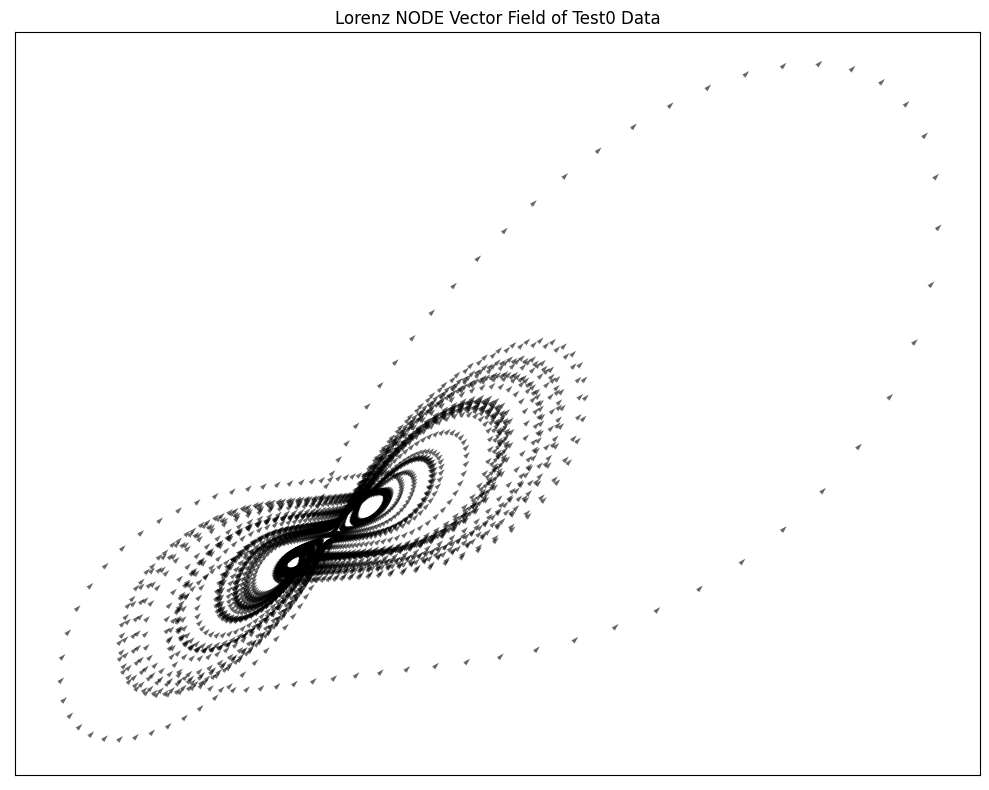

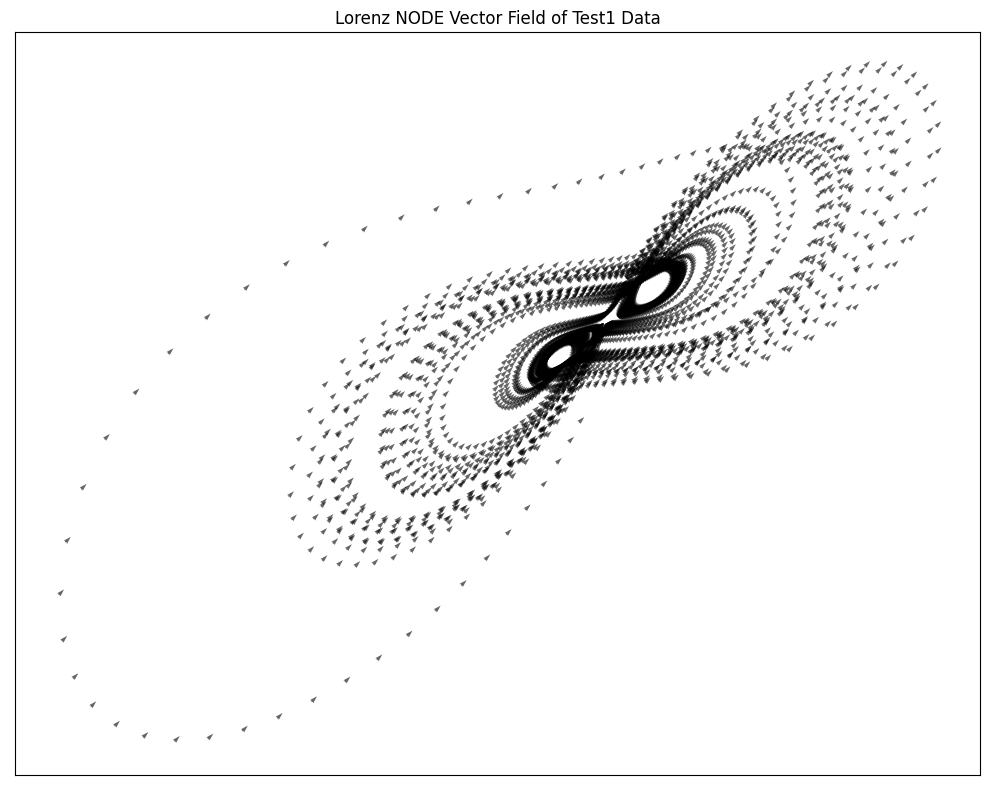

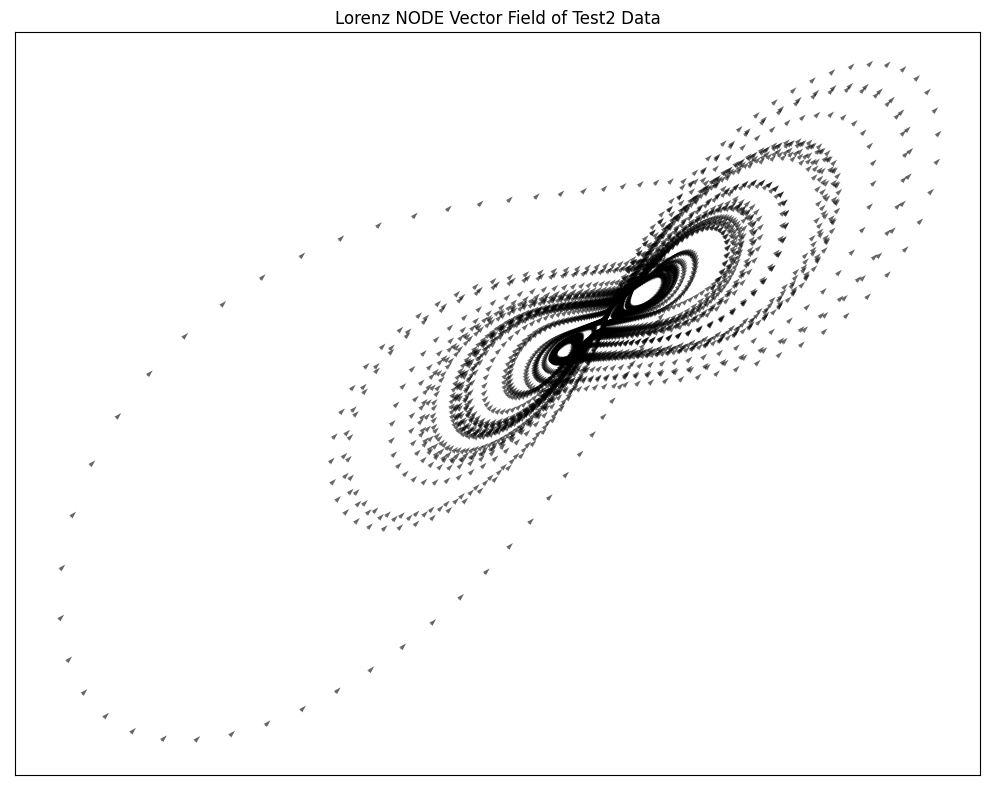

In [133]:
plot_vector_field(pred)

In [134]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field of Test{idx} Data')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.tight_layout()
        plt.show()

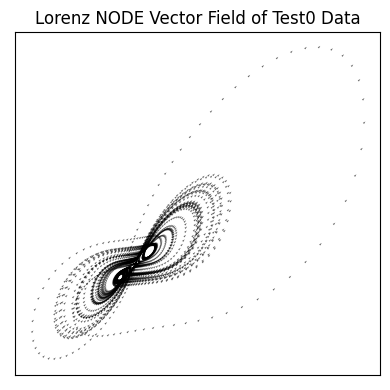

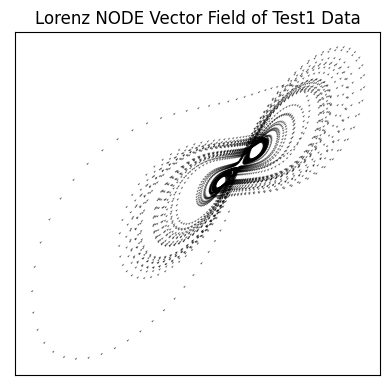

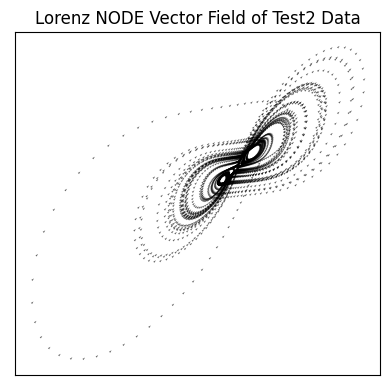

In [135]:
plot_vector_field(pred)

In [136]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(1,3,figsize=(4, 4))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field of Test{idx} Data')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.tight_layout()
        plt.show()

In [137]:
plot_vector_field(pred)

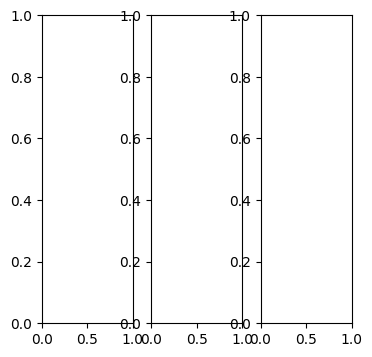

In [138]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(3,1,figsize=(4, 4))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field of Test{idx} Data')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.tight_layout()
        plt.show()

In [139]:
plot_vector_field(pred)

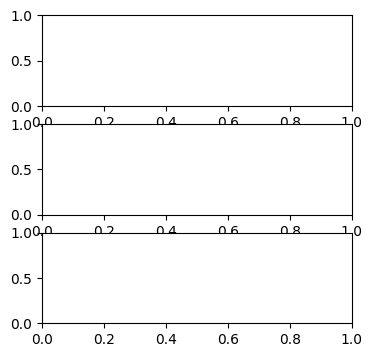

In [140]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field of Test{idx} Data')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.tight_layout()
        plt.show()

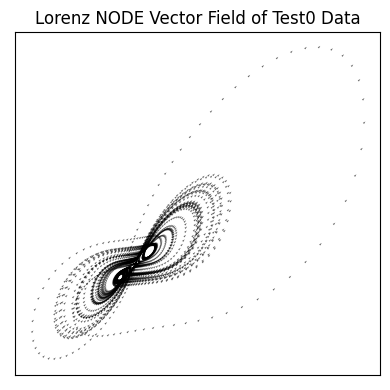

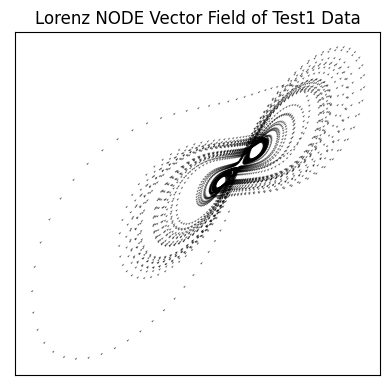

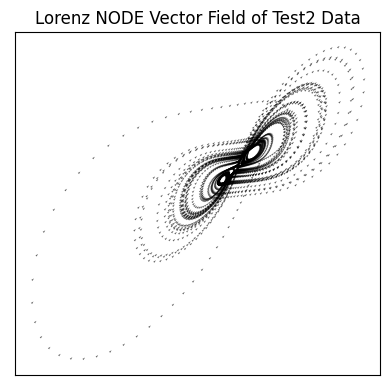

In [141]:
plot_vector_field(pred)

In [142]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(1,3,figsize=(4, 4))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field of Test{idx} Data')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.tight_layout()
        plt.show()

In [143]:
plot_vector_field(pred)

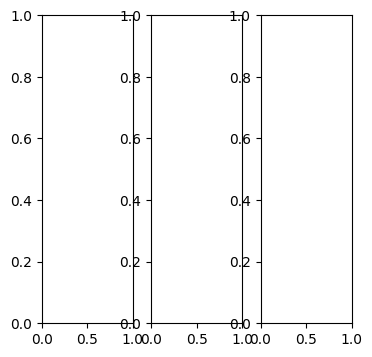

In [144]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(3,1,figsize=(4, 4))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field of Test{idx} Data')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.tight_layout()
        plt.show()

In [145]:
plot_vector_field(pred)

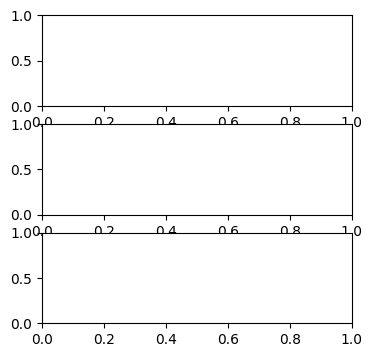

In [146]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field of Test{idx} Data')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.tight_layout()
        plt.show()

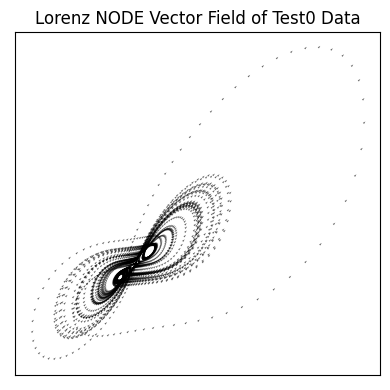

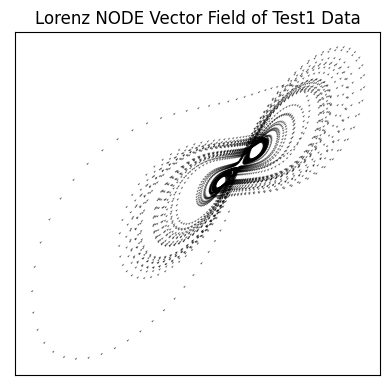

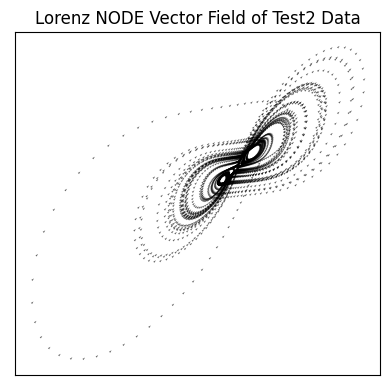

In [147]:
plot_vector_field(pred)

In [148]:
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
grid = np.meshgrid(x_range, y_range)
grid_points = np.vstack((grid[0].flatten(), grid[1].flatten())).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32, requires_grad=True)

# Perform a forward pass through the Neural ODE model while tracking gradients
with torch.no_grad():
    ode_output = test_model(grid_tensor)

# Calculate the vector field components by computing gradients
vector_field = torch.autograd.grad(ode_output, grid_tensor, torch.ones_like(ode_output), retain_graph=True)[0]

# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]

# Plot the vector field using Matplotlib
plt.figure(figsize=(8, 6))
plt.quiver(grid_points[:, 0], grid_points[:, 1], U.numpy(), V.numpy(), scale=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Neural ODE Vector Field')
plt.show()

In [149]:
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
grid = np.meshgrid(x_range, y_range)
grid_points = np.vstack((grid[0].flatten(), grid[1].flatten())).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32, requires_grad=True)

# Perform a forward pass through the Neural ODE model while tracking gradients
with torch.no_grad():
    ode_output = test_model(t,grid_tensor)

# Calculate the vector field components by computing gradients
vector_field = torch.autograd.grad(ode_output, grid_tensor, torch.ones_like(ode_output), retain_graph=True)[0]

# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]

# Plot the vector field using Matplotlib
plt.figure(figsize=(8, 6))
plt.quiver(grid_points[:, 0], grid_points[:, 1], U.numpy(), V.numpy(), scale=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Neural ODE Vector Field')
plt.show()

In [150]:
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
grid = np.meshgrid(x_range, y_range)
grid_points = np.vstack((grid[0].flatten(), grid[1].flatten())).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32, requires_grad=True)

# Perform a forward pass through the Neural ODE model while tracking gradients
with torch.no_grad():
    ode_output = test_model(t,grid_tensor.to(device))

# Calculate the vector field components by computing gradients
vector_field = torch.autograd.grad(ode_output, grid_tensor, torch.ones_like(ode_output), retain_graph=True)[0]

# Extract the x and y components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]

# Plot the vector field using Matplotlib
plt.figure(figsize=(8, 6))
plt.quiver(grid_points[:, 0], grid_points[:, 1], U.numpy(), V.numpy(), scale=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Neural ODE Vector Field')
plt.show()

In [151]:
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
z_range = np.linspace(-1, 1, 20)

# Create a 3D grid using meshgrid
grid = np.meshgrid(x_range, y_range, z_range)

# Flatten the grid points and create a tensor
grid_points = np.vstack((grid[0].flatten(), grid[1].flatten(), grid[2].flatten())).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32, requires_grad=True)

# Perform a forward pass through the Neural ODE model while tracking gradients
with torch.no_grad():
    t = 0  # You may need to set the appropriate time step here
    ode_output = test_model(t, grid_tensor.to(device))

# Calculate the vector field components by computing gradients
vector_field = torch.autograd.grad(ode_output, grid_tensor, torch.ones_like(ode_output), retain_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Plot the 3D vector field using Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], U.numpy(), V.numpy(), W.numpy(), length=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Neural ODE Vector Field')
plt.show()

In [152]:
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
z_range = np.linspace(-1, 1, 20)

# Create a 3D grid using meshgrid
grid = np.meshgrid(x_range, y_range, z_range)

# Flatten the grid points and create a tensor
grid_points = np.vstack((grid[0].flatten(), grid[1].flatten(), grid[2].flatten())).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32, requires_grad=True)
vec_time = torch.tensor([0.], dtype=torch.float32)
# Perform a forward pass through the Neural ODE model while tracking gradients
with torch.no_grad():
    t = 0  # You may need to set the appropriate time step here
    ode_output = test_model(vec_time, grid_tensor.to(device))

# Calculate the vector field components by computing gradients
vector_field = torch.autograd.grad(ode_output, grid_tensor, torch.ones_like(ode_output), retain_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Plot the 3D vector field using Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], U.numpy(), V.numpy(), W.numpy(), length=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Neural ODE Vector Field')
plt.show()

In [153]:
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
z_range = np.linspace(-1, 1, 20)

# Create a 3D grid using meshgrid
grid = np.meshgrid(x_range, y_range, z_range)

# Flatten the grid points and create a tensor
grid_points = np.vstack((grid[0].flatten(), grid[1].flatten(), grid[2].flatten())).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32, requires_grad=True)
vec_time = torch.tensor([0.], dtype=torch.float32)
# Perform a forward pass through the Neural ODE model while tracking gradients
with torch.no_grad():
    t = 0  # You may need to set the appropriate time step here
    ode_output = test_model(vec_time, grid_tensor.to(device))

# Calculate the vector field components by computing gradients
vector_field = torch.autograd.grad(ode_output, grid_tensor, torch.ones_like(ode_output), retain_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Plot the 3D vector field using Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], U.numpy(), V.numpy(), W.numpy(), length=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Neural ODE Vector Field')
plt.show()

In [154]:
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
z_range = np.linspace(-1, 1, 20)

# Create a 3D grid using meshgrid
grid = np.meshgrid(x_range, y_range, z_range)

# Flatten the grid points and create a tensor
grid_points = np.vstack((grid[0].flatten(), grid[1].flatten(), grid[2].flatten())).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32, requires_grad=True)
vec_time = torch.tensor([0.], dtype=torch.float32)
# Perform a forward pass through the Neural ODE model while tracking gradients
with torch.no_grad():
    t = 0  # You may need to set the appropriate time step here
    ode_output = odeint(test_model,grid_tensor.to(device),vec_time.to(device))

# Calculate the vector field components by computing gradients
vector_field = torch.autograd.grad(ode_output, grid_tensor, torch.ones_like(ode_output), retain_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Plot the 3D vector field using Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], U.numpy(), V.numpy(), W.numpy(), length=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Neural ODE Vector Field')
plt.show()

In [155]:
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
z_range = np.linspace(-1, 1, 20)

# Create a 3D grid using meshgrid
grid = np.meshgrid(x_range, y_range, z_range)

# Flatten the grid points and create a tensor
grid_points = np.vstack((grid[0].flatten(), grid[1].flatten(), grid[2].flatten())).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32, requires_grad=True)
vec_time = torch.tensor([0.], dtype=torch.float32)
# Perform a forward pass through the Neural ODE model while tracking gradients
with torch.no_grad():
    t = 0  # You may need to set the appropriate time step here
    ode_output = test_model(vec_time, grid_tensor.to(device))

# Calculate the vector field components by computing gradients
vector_field = torch.autograd.grad(ode_output, grid_tensor, torch.ones_like(ode_output), retain_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Plot the 3D vector field using Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], U.numpy(), V.numpy(), W.numpy(), length=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Neural ODE Vector Field')
plt.show()

In [156]:
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
z_range = np.linspace(-1, 1, 20)

# Create a 3D grid using meshgrid
grid = np.meshgrid(x_range, y_range, z_range)

# Flatten the grid points and create a tensor
grid_points = np.vstack((grid[0].flatten(), grid[1].flatten(), grid[2].flatten())).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32, requires_grad=True)
vec_time = torch.tensor([0.], dtype=torch.float32)
# Perform a forward pass through the Neural ODE model while tracking gradients
with torch.no_grad():
    t = 0  # You may need to set the appropriate time step here
    ode_output = test_model(vec_time, grid_tensor.to(device))

# Calculate the vector field components by computing gradients
vector_field = torch.autograd.grad(ode_output, grid_tensor.requires_grad_(), torch.ones_like(ode_output), retain_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Plot the 3D vector field using Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], U.numpy(), V.numpy(), W.numpy(), length=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Neural ODE Vector Field')
plt.show()

In [157]:
x_range = np.linspace(-1, 1, 20)
y_range = np.linspace(-1, 1, 20)
z_range = np.linspace(-1, 1, 20)

# Create a 3D grid using meshgrid
grid = np.meshgrid(x_range, y_range, z_range)

# Flatten the grid points and create a tensor
grid_points = np.vstack((grid[0].flatten(), grid[1].flatten(), grid[2].flatten())).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32, requires_grad=True)
vec_time = torch.tensor([0.], dtype=torch.float32)
# Perform a forward pass through the Neural ODE model while tracking gradients
with torch.no_grad():
    t = 0  # You may need to set the appropriate time step here
    ode_output = test_model(vec_time, grid_tensor.to(device))

# Calculate the vector field components by computing gradients
vector_field = torch.autograd.grad(ode_output, grid_tensor, torch.ones_like(ode_output), retain_graph=True)[0]

# Extract the x, y, and z components of the vector field
U = vector_field[:, 0]
V = vector_field[:, 1]
W = vector_field[:, 2]

# Plot the 3D vector field using Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], U.numpy(), V.numpy(), W.numpy(), length=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Neural ODE Vector Field')
plt.show()

In [158]:
def plot_vector_field(predictions):
    for idx in range(len(pred)):
        positions = pred[idx][:, 0, :]  # Extracting the 3 components as positions

        # Create a new tensor with requires_grad=True
        positions = positions.clone().detach().requires_grad_(True)

        # Calculate the vector field by taking the derivatives of positions
        vector_field = torch.autograd.grad(positions, positions, torch.ones_like(positions), create_graph=True)[0]

        # Extract the x, y, and z components of the vector field
        U = vector_field[:, 0]
        V = vector_field[:, 1]
        W = vector_field[:, 2]

        # Move tensors to CPU before converting to NumPy arrays
        positions = positions.cpu().detach().numpy()
        U = U.cpu().detach().numpy()
        V = V.cpu().detach().numpy()
        W = W.cpu().detach().numpy()

        # Create a subset of positions for the arrows
        arrow_step = 1  # Adjust this to change the density of arrows
        arrow_positions = positions[::arrow_step]

        # Calculate arrow directions by normalizing the vector field components
        magnitude = np.sqrt(U**2 + V**2 + W**2)
        arrow_U = U / magnitude
        arrow_V = V / magnitude

        # Plot the vector field with arrows
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.quiver(arrow_positions[:, 0], arrow_positions[:, 1], arrow_U[::arrow_step], arrow_V[::arrow_step], width=0.004, alpha=0.6)
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_yticks([])  # Remove y-axis ticks
        ax.set_xlabel('')   # Remove x-axis label
        ax.set_ylabel('')   # Remove y-axis label
        plt.title(f'Lorenz NODE Vector Field of Test{idx}  Predictions')
        plt.savefig(f'PNG/lorenz_NODE_Vector_Field{idx}.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
        plt.tight_layout()
        plt.show()

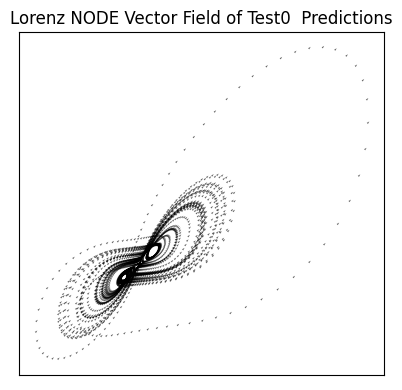

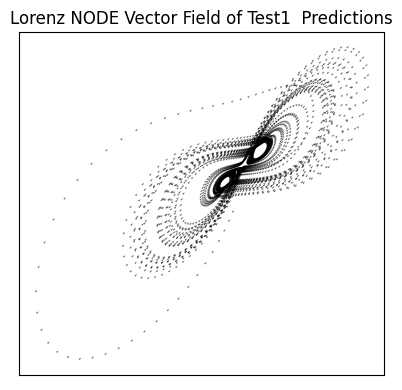

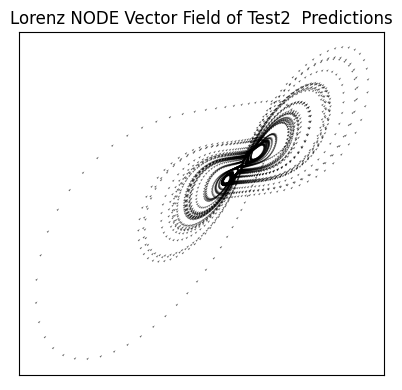

In [159]:
plot_vector_field(pred)

In [160]:
def visualize(real=None, train=None, save=None, title=''):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    ax.set_title('Lorenz Attractor \n'+title)

    if train is not None:
      sns.set(style='darkgrid')
      
      z = np.array([o.detach().numpy() for o in train])
      z = np.reshape(z, [-1,3])
      sc = ax.scatter(z[:,0], z[:,1], z[:,2], c=z[:,2], cmap='Greens', s=1)

    if real is not None:
      sns.set(style='darkgrid')
      
      z = np.array([o.detach().numpy() for o in real])
      z = np.reshape(z, [-1,3])
      ax.scatter(z[:,0], z[:,1], z[:,2], marker='.', color='k', alpha=0.5, linewidths=0, s=45)

    fig.canvas.draw()
    fig.canvas.flush_events()
    if save is not None:
        plt.savefig(save+'.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
    plt.show()

In [161]:
class Lorenz(nn.Module):
    """
    chaotic lorenz system
    """
    def __init__(self):
        super(Lorenz, self).__init__()
        self.lin = nn.Linear(5, 3, bias=False)
        W = torch.tensor([[-10., 10., 0., 0., 0.],
                          [28., -1., 0., -1., 0.],
                          [0., 0., -8. / 3., 0., 1.]])
        self.lin.weight = nn.Parameter(W)

    def forward(self, t, x):
        y = y = torch.ones([1, 5])
        y[0][0] = x[0][0]
        y[0][1] = x[0][1]
        y[0][2] = x[0][2]
        y[0][3] = x[0][0] * x[0][2]
        y[0][4] = x[0][0] * x[0][1]
        return self.lin(y)

true_y0 = torch.tensor([[0.5, 0.5, 20.]])  # initial condition
t = torch.linspace(0., 50., 5000)  # t is from 0 to 25 for 1000 data points

In [162]:
# generating training data
with torch.no_grad():
    data = odeint(Lorenz(), true_y0, t)

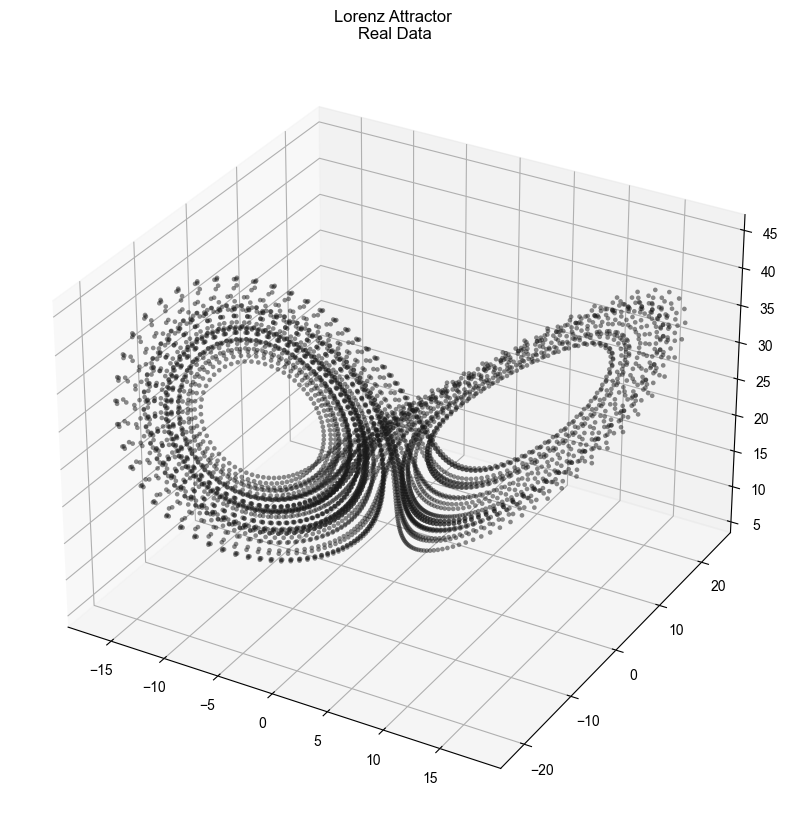

In [163]:
visualize(real=data,save='real',title='Real Data')

In [164]:
from torch.utils.data import DataLoader

In [165]:
import os
import wandb
import numpy as np
from IPython.display import clear_output
import seaborn as sns
from torchdiffeq import odeint
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [166]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
print("GPU Name:", torch.cuda.get_device_name(0))

In [167]:
np.random.seed(7)
torch.manual_seed(7)

In [168]:
wandb.login()

True

In [169]:
wandb.init(project="lorenz_NODE", group="Lorenz",save_code=True,notes="Neural ODE runs and evaluation")